<a href="https://colab.research.google.com/github/Abimbola-ai/Blood-Spectorscopy/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable
from tqdm import tqdm
tqdm.pandas()
import tqdm
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
seed = 42

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [2]:
train = pd.read_csv("all_train.csv",index_col=[0])
test = pd.read_csv("all_test.csv",index_col=[0])
# train = pd.read_csv("clean_train.csv",index_col=[0])
# test = pd.read_csv("clean_test.csv",index_col=[0])

In [3]:
scaled_features_train = train.copy()
scaled_features_test = test.copy()

def scale_data(df):
    col_names = ['absorbance0', 'absorbance1', 'absorbance2',
       'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6',
       'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10',
       'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14',
       'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18',
       'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22',
       'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26',
       'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30',
       'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34',
       'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38',
       'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42',
       'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46',
       'absorbance47', 'absorbance48',
       'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52',
       'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56',
       'absorbance57', 'absorbance58', 'absorbance59', 'absorbance60',
       'absorbance61', 'absorbance62', 'absorbance63', 'absorbance64',
       'absorbance65', 'absorbance66', 'absorbance67', 'absorbance68',
       'absorbance69', 'absorbance70', 'absorbance71', 'absorbance72',
       'absorbance73', 'absorbance74', 'absorbance75', 'absorbance76',
       'absorbance77', 'absorbance78', 'absorbance79', 'absorbance80',
       'absorbance81', 'absorbance82', 'absorbance83', 'absorbance84',
       'absorbance85', 'absorbance86', 'absorbance87', 'absorbance88',
       'absorbance89', 'absorbance90', 'absorbance91', 'absorbance92',
       'absorbance93', 'absorbance94', 'absorbance95', 'absorbance96',
       'absorbance97', 'absorbance98',
       'absorbance99', 'absorbance100', 'absorbance101', 'absorbance102',
       'absorbance103', 'absorbance104', 'absorbance105', 'absorbance106',
       'absorbance107', 'absorbance108', 'absorbance109', 'absorbance110',
       'absorbance111', 'absorbance112', 'absorbance113', 'absorbance114',
       'absorbance115', 'absorbance116', 'absorbance117', 'absorbance118',
       'absorbance119', 'absorbance120', 'absorbance121', 'absorbance122',
       'absorbance123', 'absorbance124', 'absorbance125', 'absorbance126',
       'absorbance127', 'absorbance128', 'absorbance129', 'absorbance130',
       'absorbance131', 'absorbance132', 'absorbance133', 'absorbance134',
       'absorbance135', 'absorbance136', 'absorbance137', 'absorbance138',
       'absorbance139', 'absorbance140', 'absorbance141', 'absorbance142',
       'absorbance143', 'absorbance144', 'absorbance145', 'absorbance146',
       'absorbance147', 'absorbance148', 'absorbance149', 'absorbance150',
       'absorbance151', 'absorbance152', 'absorbance153', 'absorbance154',
       'absorbance155', 'absorbance156', 'absorbance157', 'absorbance158',
       'absorbance159', 'absorbance160', 'absorbance161', 'absorbance162',
       'absorbance163', 'absorbance164', 'absorbance165', 'absorbance166',
       'absorbance167', 'absorbance168', 'absorbance169', 'temperature',
       'humidity','std']
        #'low_abs', 'high_abs', 'med_abs',
       #'mean_abs', 'std_abs', 'sum_abs']
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [4]:
train_scaled = scale_data(scaled_features_train)
test_scaled = scale_data(scaled_features_test)

In [5]:
train_scaled.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id,Unnamed: 0.1,Reading_ID,id
0,0.674339,0.690008,0.667974,0.675166,0.665819,0.653156,0.640374,0.637125,0.636820,0.641131,...,0.032258,0.395768,0.593198,0,1,2,2250,NaN,NaN,NaN
1,0.693909,0.706625,0.696928,0.693563,0.683570,0.678725,0.671326,0.663274,0.670402,0.671500,...,0.032258,0.401171,0.591477,0,1,2,2250,NaN,NaN,NaN
2,0.692302,0.699591,0.695227,0.687406,0.691292,0.680784,0.671594,0.663830,0.661735,0.663161,...,0.032258,0.406123,0.589539,0,1,2,2250,NaN,NaN,NaN
3,0.697283,0.699202,0.693032,0.688659,0.690590,0.681708,0.671415,0.661266,0.655538,0.659933,...,0.032258,0.410626,0.587172,0,1,2,2250,NaN,NaN,NaN
4,0.690153,0.710552,0.689567,0.686179,0.694654,0.678784,0.668452,0.662425,0.661339,0.660137,...,0.032258,0.415128,0.585880,0,1,2,2250,NaN,NaN,NaN


In [6]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id,Unnamed: 0.1,Reading_ID,id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,0.0026,39.27,44.17,0,1,2,2250,NaN,NaN,NaN
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,0.0026,39.39,44.09,0,1,2,2250,NaN,NaN,NaN
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,0.0026,39.50,44.00,0,1,2,2250,NaN,NaN,NaN
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,0.0026,39.60,43.89,0,1,2,2250,NaN,NaN,NaN
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,0.0026,39.70,43.83,0,1,2,2250,NaN,NaN,NaN


In [7]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'std', 'temperature', 'humidity', 'hdl_cholesterol_human',
       'hemoglobin(hgb)_human', 'cholesterol_ldl_human', 'donation_id',
       'Unnamed: 0.1', 'Reading_ID', 'id'],
      dtype='object', length=180)

In [8]:
# Raw Data
y_hdl_cholesterol_human = train_scaled['hdl_cholesterol_human']
y_hemoglobin_hgb_human = train_scaled['hemoglobin(hgb)_human']
y_cholesterol_ldl_human = train_scaled["cholesterol_ldl_human"]
train_unscaled = train.drop(['donation_id', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human','Unnamed: 0.1', 'Reading_ID', 'id'], axis=1)
train_scaled_drop = train_scaled.drop(['donation_id', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human','Unnamed: 0.1', 'Reading_ID', 'id'], axis=1)

df_train = train_scaled_drop.copy()
df_trainu = train_unscaled.copy() #Unscaled data
print(df_train.shape)
print(y_hdl_cholesterol_human.shape)
print(y_hemoglobin_hgb_human.shape)
print(y_cholesterol_ldl_human.shape)

(21300, 173)
(21300,)
(21300,)
(21300,)


In [9]:
X_cols = list(df_train.columns)
X_test = test_scaled[X_cols] # Scaled test data
X_testu = test[X_cols] # Unscaled test data

In [10]:
def hyperparameter_model(models, params, x_train, y_train):
    '''
    Hyperparameter tuning with RepeatedStratifiedKFold follow by GridSearchCV
    
    Parameters:
    models: Instance of the model
    params: list of parameters with value for tuning (dict)
    
    Return:
    grid_clf: return gridsearch model    
    '''
    str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
    grid_clf = GridSearchCV(models, params, cv=str_cv, return_train_score=True, scoring='roc_auc')
    grid_clf.fit(x_train, y_train)
    return grid_clf

def forward_selection_model(x_train, y_train,model, top_n=10):
    top_column = []
    exist_score = 0
    for n in range(top_n):
        print('for {} feature'.format(n+1))
        flag = 0
        for i in tqdm.tqdm_notebook(range(X_test.shape[1])):
            if len(top_column) == 0:
                str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                score = cross_val_score(model,x_train[:,[i]],y_train,cv=str_cv,scoring='roc_auc')
                if exist_score < np.mean(score):
                    top_current = i
                    exist_score = np.mean(score)
                    flag = 1
            elif i not in top_column:
                str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                score = cross_val_score(model,x_train[:,np.concatenate((top_column,[i]))],y_train,cv=str_cv,scoring='roc_auc')
                if exist_score < np.mean(score):
                    top_current = i
                    exist_score = np.mean(score)
                    flag = 1
        
        if flag == 1:
            print('Current top feature {} and score: {}'.format(top_current,exist_score))
            print('Appended to top column')
            top_column.append(top_current)
            print(top_column)
        else:
            break
    return top_column


def plot_feature_importance(model, model_name, top_n = 10):
    '''  
    Parameters:
    model: model 
    model_name: name of the model
  
    Return:
    Top 10 features of the dataset  
    '''       
    column_name = train.drop(['id','target'], axis=1).columns
    if model_name == 'log_model':
        feat_imp_coef = model.coef_.ravel()
    else:
        feat_imp_coef = model.feature_importances_
    temp = pd.DataFrame(data=np.column_stack((column_name, feat_imp_coef)), columns=['col_name','coef'])
    temp = temp.sort_values(by='coef', ascending=False).reset_index()
    df = temp
    temp = temp[:top_n]
    return temp

In [11]:
reverse_mapping = {'0' : 'low', '1' : 'ok', '2' : 'high'}

#### Build each model individually

##### A. Baseline Model - Logistic Regression

- hdl cholesterol human

In [12]:
log_reg = LogisticRegression(random_state=seed)
log_reg.fit(df_trainu,y_hdl_cholesterol_human)
hdl_cholesterol_human = log_reg.predict(X_testu)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

- ldl cholesterol human

In [13]:
log_reg2 = LogisticRegression(random_state=seed)
log_reg2.fit(df_trainu,y_cholesterol_ldl_human)
cholesterol_ldl_human = log_reg2.predict(X_testu)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

- hemoglobin human

In [14]:
log_reg3 = LogisticRegression(random_state=seed)
log_reg3.fit(df_trainu,y_hemoglobin_hgb_human)

hemoglobin_hgb_human = log_reg3.predict(X_testu)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

Leaderboard score with logistic regression is 0.5821917808219178. Using all the data scaled without feature engineering or taking the mean of all donation id yielded a score of 0.563, while unscaled yielded 0.566.

##### B. Logistic Regression with optimization

- hdl cholesterol human

In [ ]:
params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
log_model_hdl = LogisticRegression(random_state=42, class_weight='balanced')
log_clf_hdl = hyperparameter_model(log_model_hdl, params, df_train,y_hdl_cholesterol_human)
print(log_clf_hdl.best_params_)

log_model_hdl = LogisticRegression(**log_clf_hdl.best_params_, class_weight='balanced', random_state=42)
log_model_hdl.fit(df_train,y_hdl_cholesterol_human)

hdl_cholesterol_human = log_model_hdl.predict(X_test)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

- ldl cholesterol human

In [ ]:
params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
log_model_ldl = LogisticRegression(random_state=42, class_weight='balanced')
log_clf_ldl = hyperparameter_model(log_model_ldl, params, df_train,y_cholesterol_ldl_human)
print(log_clf_ldl.best_params_)

log_model_ldl = LogisticRegression(**log_clf_ldl.best_params_, class_weight='balanced', random_state=seed)
log_model_ldl.fit(df_train,y_cholesterol_ldl_human)

cholesterol_ldl_human = log_model_ldl.predict(X_test)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

- hemoglobin human

In [ ]:
params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
log_model_hgb = LogisticRegression(random_state=42, class_weight='balanced')
log_clf_hgb = hyperparameter_model(log_model_hgb, params, df_train,y_hemoglobin_hgb_human)
print(log_clf_hgb.best_params_)

log_model_hgb = LogisticRegression(**log_clf_hgb.best_params_, class_weight='balanced', random_state=seed)
log_model_hgb.fit(df_train,y_hemoglobin_hgb_human)

hemoglobin_hgb_human = log_model_hgb.predict(X_test)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

Submission score dropped to 0.5753424657534246 

#### C. PCA & Logistic Regression

In [ ]:
# # https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
# # https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
def pca_lr(x_train, y_train):
    pca = PCA()

    logistic = LogisticRegression(random_state = 42,solver='liblinear',max_iter=10000, tol=0.1)
    pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'pca__n_components': np.arange(170),
    'logistic__C': np.logspace(-4, 4, 4),
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=-1)
    search.fit(x_train, y_train)
    print('Best parameter (CV score=%0.3f):' % search.best_score_)
    print(search.best_params_)

    # Plot the PCA spectrum
    pca.fit(x_train)

    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
    ax0.plot(np.arange(1, pca.n_components_ + 1),
         np.cumsum(pca.explained_variance_ratio_), '+', linewidth=2)
    ax0.set_ylabel('PCA cummulative explained variance ratio')

    ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
    ax0.legend(prop=dict(size=12))

    # For each number of components, find the best classifier results
    results = pd.DataFrame(search.cv_results_)
    components_col = 'param_pca__n_components'
    best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

    best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
    ax1.set_ylabel('Classification accuracy (val)')
    ax1.set_xlabel('n_components')

    plt.xlim(-1, 70)
    plt.tight_layout()
    plt.show()

    #print(f'Cummulative explained variance ratio:',np.cumsum(pca.explained_variance_ratio_))


- hdl cholesterol human

In [ ]:
pca_lr(df_train,y_hdl_cholesterol_human)
hdl_cholesterol_human = search.predict(X_test)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

In [ ]:
pca_lr(df_train,y_cholesterol_ldl_human)
cholesterol_ldl_human = search.predict(X_test)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

In [ ]:
pca_lr(df_train,y_hemoglobin_hgb_human)
hemoglobin_hgb_human = search.predict(X_test)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

Score with PCA is 0.56 

#### D. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_hdl = RandomForestClassifier(random_state=seed)
rf_hdl.fit(df_train,y_hdl_cholesterol_human)
print("Random forest trained on unscaled data")

hdl_cholesterol_human = rf_hdl.predict(X_test)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()


In [ ]:
rf_ldl = RandomForestClassifier(random_state=seed)
rf_ldl.fit(df_train,y_cholesterol_ldl_human)
print("Random forest trained on unscaled data")

cholesterol_ldl_human = rf_ldl.predict(X_test)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

In [ ]:
rf_hgb = RandomForestClassifier(random_state=seed)
rf_hgb.fit(df_train,y_hemoglobin_hgb_human)
print("Random forest trained on unscaled data")

hemoglobin_hgb_human = rf_hgb.predict(X_test)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

RF without optimization gave a score of 0.541 with unscaled data. and 0.51 with scaled data.

#### E. Random Forest Classifier with optimization

In [ ]:
params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
rf_model_ldl = RandomForestClassifier(random_state=seed)
rf_clf_ldl = hyperparameter_model(rf_model_ldl, params,df_train,y_cholesterol_ldl_human)
print(rf_clf_ldl.best_params_)
rf_clf_ldl = RandomForestClassifier(**rf_clf_ldl.best_params_,random_state=seed)
rf_clf_ldl.fit(df_trainu,y_cholesterol_ldl_human)

cholesterol_ldl_human = rf_clf_ldl.predict(X_test)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

In [ ]:
params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
rf_model_hdl = RandomForestClassifier(random_state=seed)
rf_clf_hdl = hyperparameter_model(rf_model_hdl, params,df_train,y_hdl_cholesterol_human)
print(rf_clf_hdl.best_params_)
rf_clf_hdl = RandomForestClassifier(**rf_clf_hdl.best_params_,random_state=seed)
rf_clf_hdl.fit(df_trainu,y_hdl_cholesterol_human)

hdl_cholesterol_human = rf_clf_hdl.predict(X_test)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

In [ ]:
params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
rf_model_hgb = RandomForestClassifier(random_state=seed)
rf_clf_hgb = hyperparameter_model(rf_model_hgb, params,df_train,y_hemoglobin_hgb_human)
print(rf_clf_hgb.best_params_)
rf_clf_hgb = RandomForestClassifier(**rf_clf_hgb.best_params_,random_state=seed)
rf_clf_hgb.fit(df_trainu,y_hemoglobin_hgb_human)

hemoglobin_hgb_human = rf_clf_hgb.predict(X_test)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

Rf with optimization on unscaled data gives 0.582 score, with scaled data gies 0.554

#### F. SVC Classifier 

In [ ]:
params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
svc_model_ldl = SVC(class_weight='balanced', random_state=seed, probability=True)
svc_clf_ldl = hyperparameter_model(svc_model_ldl, params,df_train,y_cholesterol_ldl_human)
print(svc_clf_ldl.best_params_)
svc_clf_ldl = SVC(**svc_clf_ldl.best_params_,random_state=seed,probability=True)
svc_clf_ldl.fit(df_trainu,y_cholesterol_ldl_human)

cholesterol_ldl_human = rf_clf_ldl.predict(X_test)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

In [ ]:
params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
svc_model_hdl = SVC(class_weight='balanced', random_state=seed, probability=True)
svc_clf_hdl = hyperparameter_model(svc_model_hdl, params,df_train,y_hdl_cholesterol_human)
print(svc_clf_hdl.best_params_)
svc_clf_hdl = SVC(**svc_clf_hdl.best_params_,random_state=seed,probability=True)
svc_clf_hdl.fit(df_trainu,y_hdl_cholesterol_human)

hdl_cholesterol_human = rf_clf_hdl.predict(X_test)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

In [ ]:
params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
svc_model_hgb = SVC(class_weight='balanced', random_state=seed, probability=True)
svc_clf_hgb = hyperparameter_model(svc_model_hgb, params,df_train,y_hemoglobin_hgb_human)
print(svc_clf_hgb.best_params_)
svc_clf_hgb = SVC(**svc_clf_hgb.best_params_,random_state=seed,probability=True)
svc_clf_hgb.fit(df_trainu,y_hemoglobin_hgb_human)

hemoglobin_hgb_human = svc_clf_hgb.predict(X_test)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

With unscaled data gave a score of 0.5829

##### G. Catboost Algorithm
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00349-y

- hdl cholesterol human

In [ ]:
!pip install catboost

In [ ]:
# !pip install optuna


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["MultiClass","MultiClassOneVsAll"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),  
    }
    # Conditional Hyper-Parameters
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    reg = CatBoostClassifier(**param)
    reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)
    y_pred = reg.predict(X_test)
    score = accuracy_score(y_test, y_pred,normalize=False)
    return score

In [ ]:
# "Logloss", "CrossEntropy", "MultiClassOneVsAll",

In [ ]:
#LDL
from optuna.samplers import TPESampler

X = df_trainu
y = y_cholesterol_ldl_human

study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
cat_model_ldl = CatBoostClassifier(loss_function = 'MultiClass',
                                   learning_rate = 6.447911714090859e-05,
                                   l2_leaf_reg = 0.02120959816527062,colsample_bylevel = 0.02345568909821258,depth = 3,
                                   boosting_type = "Plain",bootstrap_type = "Bayesian",min_data_in_leaf = 3,
                                   one_hot_max_size = 11,bagging_temperature = 3.8517108825279402,)

In [ ]:
study.best_trial.params

In [ ]:
cat_model_ldl = CatBoostClassifier(**study.best_trial.params)

In [ ]:
cat_model_ldl = CatBoostClassifier(loss_function = 'MultiClassOneVsAll',
                                   learning_rate = 0.0005082181545580776,
                                   l2_leaf_reg = 0.02434332224091455,colsample_bylevel = 0.07695581371024932,depth = 5,
                                   boosting_type = "Plain",bootstrap_type = "MVS",min_data_in_leaf = 15,
                                   one_hot_max_size = 7)

In [ ]:
# Cholesterol ldl
cat_ldl = cat_model_ldl.fit(df_trainu,y_cholesterol_ldl_human)
cholesterol_ldl_human = cat_ldl.predict(X_testu)
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

In [ ]:
# HDL Cholesterol
X = df_trainu
y = y_hdl_cholesterol_human

study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
cat_model_hdl = CatBoostClassifier(**study.best_trial.params)

In [ ]:
# Cholesterol hdl
cat_hdl = cat_model_hdl.fit(df_trainu,y_hdl_cholesterol_human)
hdl_cholesterol_human = cat_hdl.predict(X_testu)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

In [ ]:
# Heamoglobin
X = df_trainu
y = y_hemoglobin_hgb_human

study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
cat_model_hgb = CatBoostClassifier(**study.best_trial.params)

In [ ]:
# Heamoglobin
cat_hgb = cat_model_hgb.fit(df_trainu,y_hemoglobin_hgb_human)
hemoglobin_hgb_human = cat_hgb.predict(X_testu)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

In [ ]:
from catboost import CatBoostClassifier, Pool
def cat_model_boost(x_train,y_train):
    cat_model = CatBoostClassifier(
    iterations=1000,
    loss_function='MultiClass',
    bootstrap_type='Bayesian',
    eval_metric='MultiClass',
    leaf_estimation_iterations=100,
    random_strength=0.5,
    depth=7,
    l2_leaf_reg=5,
    learning_rate=0.01,
    bagging_temperature=0.5,
    task_type=None,
)
    # cross validation function to find the best parameters
    scores = []
    for i in range(10):
        scores.append(cross_val_score(cat_model,x_train,y_train,cv=5))
    print(scores)
    print("The 10 times 10 fold accuracy of the catboost classifier is: ",np.average(scores))   
    return cat_model


In [ ]:
Cholesterol hdl
cat_hdl = cat_model_boost(df_train,y_hdl_cholesterol_human)
hdl_cholesterol_human = cat_hdl.predict(X_test)
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

In [ ]:
# Heamoglobin
cat_hgb = cat_model_boost(df_train,y_hdl_cholesterol_human)
hemoglobin_hgb_human = cat_hgb.predict(X_test)
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

Catboost with scaled data gave a score of 0.46, with a learning rat of 0.01, it improved the score to 0.49. Maximum gotten with catboost on scaled data is 0.55. Catboost with unscaled data:0.547945

#### XBNET

In [15]:
!pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-y5kxrmlu
  Running command git clone -q https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-y5kxrmlu
     |████████████████████████████████| 15.7 MB 3.7 MB/s 
     |████████████████████████████████| 11.3 MB 33.6 MB/s 
     |████████████████████████████████| 10.3 MB 19.2 MB/s 
     |████████████████████████████████| 831.4 MB 2.5 kB/s 
     |████████████████████████████████| 166.7 MB 19 kB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
  Created wheel for XBNet: filename=XBNet-1.4.6-py3-none-any.whl size=12335 sha256=6b0e116b02f12da2140a44f81a7b626f6a43b810fbf4cc0036482f7539360598
  Stored in directory: /tmp/pip-ephem-wheel-cache-dmo1xwo6/wheels/23/c6/c1/0ee5a35c7a28c4dd8db05ce1407d1ccb0cfb036216e0c2ff92
Successfully built XBNet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting un

In [12]:
import torch
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [13]:
def xbnet_model(X,y,num_layers,lr):
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state= True)
  model = XBNETClassifier(x_train,y_train, num_layers=2)
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
  m,acc, lo, val_ac, val_lo = run_XBNET(x_train.values,x_test.values,y_train.values,y_test.values,model,criterion,optimizer,epochs=100,batch_size=32)
  return m


Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


Percentage training completed:   1%|          | 1/100 [00:23<38:57, 23.61s/it]

Training Loss after epoch 1 is 0.8618762594180046 and Accuracy is 53.5345405767941
Validation Loss after epoch 1 is 0.8430017828941345 and Accuracy is 54.413145539906104


Percentage training completed:   2%|▏         | 2/100 [00:47<39:05, 23.93s/it]

Training Loss after epoch 2 is 0.8311502703269664 and Accuracy is 54.78202548625084
Validation Loss after epoch 2 is 0.8472458720207214 and Accuracy is 54.89827856025039


Percentage training completed:   3%|▎         | 3/100 [01:12<39:01, 24.14s/it]

Training Loss after epoch 3 is 0.8322931459021671 and Accuracy is 54.30583501006036
Validation Loss after epoch 3 is 0.8409168720245361 and Accuracy is 54.929577464788736


Percentage training completed:   4%|▍         | 4/100 [01:36<38:43, 24.20s/it]

Training Loss after epoch 4 is 0.8313084096356012 and Accuracy is 54.61435278336687
Validation Loss after epoch 4 is 0.8369149565696716 and Accuracy is 55.00782472613459


Percentage training completed:   5%|▌         | 5/100 [02:00<38:27, 24.29s/it]

Training Loss after epoch 5 is 0.8300910854288437 and Accuracy is 54.560697518443995
Validation Loss after epoch 5 is 0.8361623883247375 and Accuracy is 56.49452269170579


Percentage training completed:   6%|▌         | 6/100 [02:24<37:34, 23.99s/it]

Training Loss after epoch 6 is 0.829476683948173 and Accuracy is 54.74849094567404
Validation Loss after epoch 6 is 0.83003830909729 and Accuracy is 55.17996870109546


Percentage training completed:   7%|▋         | 7/100 [02:48<37:17, 24.05s/it]

Training Loss after epoch 7 is 0.830061186152978 and Accuracy is 54.85580147551978
Validation Loss after epoch 7 is 0.8362459540367126 and Accuracy is 52.64475743348983


Percentage training completed:   8%|▊         | 8/100 [03:13<37:11, 24.25s/it]

Training Loss after epoch 8 is 0.8304221801491766 and Accuracy is 54.43997317236754
Validation Loss after epoch 8 is 0.8316026329994202 and Accuracy is 56.3849765258216


Percentage training completed:   9%|▉         | 9/100 [03:37<36:54, 24.33s/it]

Training Loss after epoch 9 is 0.8298711715338056 and Accuracy is 54.76190476190476
Validation Loss after epoch 9 is 0.8245342373847961 and Accuracy is 55.97809076682316


Percentage training completed:  10%|█         | 10/100 [04:01<36:24, 24.28s/it]

Training Loss after epoch 10 is 0.8319867326210497 and Accuracy is 54.802146210596916
Validation Loss after epoch 10 is 0.8259067535400391 and Accuracy is 54.83568075117371


Percentage training completed:  11%|█         | 11/100 [04:25<35:49, 24.15s/it]

Training Loss after epoch 11 is 0.8291542692501658 and Accuracy is 54.862508383635145
Validation Loss after epoch 11 is 0.8269279599189758 and Accuracy is 56.57276995305164


Percentage training completed:  12%|█▏        | 12/100 [04:49<35:14, 24.03s/it]

Training Loss after epoch 12 is 0.8293205014881658 and Accuracy is 54.94969818913481
Validation Loss after epoch 12 is 0.8261522054672241 and Accuracy is 56.400625978090765


Percentage training completed:  13%|█▎        | 13/100 [05:13<34:51, 24.04s/it]

Training Loss after epoch 13 is 0.8289425938426169 and Accuracy is 55.28504359490275
Validation Loss after epoch 13 is 0.8292389512062073 and Accuracy is 55.93114241001565


Percentage training completed:  14%|█▍        | 14/100 [05:37<34:22, 23.98s/it]

Training Loss after epoch 14 is 0.8283499516386843 and Accuracy is 55.28504359490275
Validation Loss after epoch 14 is 0.8265753984451294 and Accuracy is 56.557120500782474


Percentage training completed:  15%|█▌        | 15/100 [06:00<33:38, 23.75s/it]

Training Loss after epoch 15 is 0.8234909737058975 and Accuracy is 55.44600938967136
Validation Loss after epoch 15 is 0.8274582624435425 and Accuracy is 55.46165884194053


Percentage training completed:  16%|█▌        | 16/100 [06:23<32:58, 23.55s/it]

Training Loss after epoch 16 is 0.8249623655249633 and Accuracy is 55.60026827632461
Validation Loss after epoch 16 is 0.8295819163322449 and Accuracy is 52.003129890453835


Percentage training completed:  17%|█▋        | 17/100 [06:47<32:44, 23.67s/it]

Training Loss after epoch 17 is 0.8482424662860166 and Accuracy is 54.929577464788736
Validation Loss after epoch 17 is 0.8304149508476257 and Accuracy is 55.97809076682316


Percentage training completed:  18%|█▊        | 18/100 [07:11<32:29, 23.77s/it]

Training Loss after epoch 18 is 0.8201270790314982 and Accuracy is 55.44600938967136
Validation Loss after epoch 18 is 0.8310149312019348 and Accuracy is 54.55399061032864


Percentage training completed:  19%|█▉        | 19/100 [07:35<32:09, 23.82s/it]

Training Loss after epoch 19 is 0.8204870762487337 and Accuracy is 55.57344064386318
Validation Loss after epoch 19 is 0.8298189043998718 and Accuracy is 55.618153364632235


Percentage training completed:  20%|██        | 20/100 [07:59<31:41, 23.76s/it]

Training Loss after epoch 20 is 0.8208288303516453 and Accuracy is 55.23809523809524
Validation Loss after epoch 20 is 0.826556384563446 and Accuracy is 56.3849765258216


Percentage training completed:  21%|██        | 21/100 [08:23<31:19, 23.79s/it]

Training Loss after epoch 21 is 0.8233697741840019 and Accuracy is 55.5533199195171
Validation Loss after epoch 21 is 0.8220967054367065 and Accuracy is 54.9452269170579


Percentage training completed:  22%|██▏       | 22/100 [08:46<30:41, 23.61s/it]

Training Loss after epoch 22 is 0.8235601941403401 and Accuracy is 55.48625083836352
Validation Loss after epoch 22 is 0.8224561214447021 and Accuracy is 55.4773082942097


Percentage training completed:  23%|██▎       | 23/100 [09:09<30:06, 23.46s/it]

Training Loss after epoch 23 is 0.8203102964188408 and Accuracy is 55.66063044936284
Validation Loss after epoch 23 is 0.8264192342758179 and Accuracy is 55.44600938967136


Percentage training completed:  24%|██▍       | 24/100 [09:33<29:52, 23.59s/it]

Training Loss after epoch 24 is 0.8307225913960534 and Accuracy is 55.51307847082495
Validation Loss after epoch 24 is 0.8224492073059082 and Accuracy is 56.056338028169016


Percentage training completed:  25%|██▌       | 25/100 [09:57<29:41, 23.76s/it]

Training Loss after epoch 25 is 0.8209547488730353 and Accuracy is 55.90207914151576
Validation Loss after epoch 25 is 0.8277741074562073 and Accuracy is 55.10172143974961


Percentage training completed:  26%|██▌       | 26/100 [10:21<29:16, 23.74s/it]

Training Loss after epoch 26 is 0.8233058430862017 and Accuracy is 55.841716968477535
Validation Loss after epoch 26 is 0.8222971558570862 and Accuracy is 55.94679186228482


Percentage training completed:  27%|██▋       | 27/100 [10:45<29:03, 23.88s/it]

Training Loss after epoch 27 is 0.8250663715370735 and Accuracy is 55.3252850435949
Validation Loss after epoch 27 is 0.825653076171875 and Accuracy is 56.25978090766823


Percentage training completed:  28%|██▊       | 28/100 [11:09<28:48, 24.01s/it]

Training Loss after epoch 28 is 0.8254180540342699 and Accuracy is 55.53319919517103
Validation Loss after epoch 28 is 0.8240824341773987 and Accuracy is 55.96244131455399


Percentage training completed:  29%|██▉       | 29/100 [11:33<28:28, 24.06s/it]

Training Loss after epoch 29 is 0.8217230811395358 and Accuracy is 55.949027498323275
Validation Loss after epoch 29 is 0.8256490230560303 and Accuracy is 55.38341158059468


Percentage training completed:  30%|███       | 30/100 [11:56<27:38, 23.69s/it]

Training Loss after epoch 30 is 0.8208562030812702 and Accuracy is 56.156941649899395
Validation Loss after epoch 30 is 0.820015013217926 and Accuracy is 55.83724569640063


Percentage training completed:  31%|███       | 31/100 [12:19<27:01, 23.50s/it]

Training Loss after epoch 31 is 0.8223728508140907 and Accuracy is 55.88866532528505
Validation Loss after epoch 31 is 0.8210504651069641 and Accuracy is 55.508607198748045


Percentage training completed:  32%|███▏      | 32/100 [12:42<26:24, 23.30s/it]

Training Loss after epoch 32 is 0.8255139292565539 and Accuracy is 55.45942320590208
Validation Loss after epoch 32 is 0.8264129757881165 and Accuracy is 55.72769953051643


Percentage training completed:  33%|███▎      | 33/100 [13:05<26:02, 23.32s/it]

Training Loss after epoch 33 is 0.9237296903593858 and Accuracy is 54.94299128101945
Validation Loss after epoch 33 is 0.8370495438575745 and Accuracy is 55.83724569640063


Percentage training completed:  34%|███▍      | 34/100 [13:29<25:51, 23.51s/it]

Training Loss after epoch 34 is 0.8128168613613931 and Accuracy is 56.37826961770624
Validation Loss after epoch 34 is 0.8286116123199463 and Accuracy is 56.30672926447574


Percentage training completed:  35%|███▌      | 35/100 [13:53<25:27, 23.49s/it]

Training Loss after epoch 35 is 0.8116112136533844 and Accuracy is 56.21730382293762
Validation Loss after epoch 35 is 0.8204134106636047 and Accuracy is 56.22848200312989


Percentage training completed:  36%|███▌      | 36/100 [14:16<24:55, 23.36s/it]

Training Loss after epoch 36 is 0.8145872605205093 and Accuracy is 56.00268276324614
Validation Loss after epoch 36 is 0.8242037296295166 and Accuracy is 56.244131455399064


Percentage training completed:  37%|███▋      | 37/100 [14:38<24:18, 23.15s/it]

Training Loss after epoch 37 is 0.8141146242106932 and Accuracy is 56.244131455399064
Validation Loss after epoch 37 is 0.8216965198516846 and Accuracy is 56.087636932707355


Percentage training completed:  38%|███▊      | 38/100 [15:01<23:45, 22.99s/it]

Training Loss after epoch 38 is 0.8163494773432932 and Accuracy is 56.156941649899395
Validation Loss after epoch 38 is 0.8253169059753418 and Accuracy is 56.15023474178404


Percentage training completed:  39%|███▉      | 39/100 [15:23<23:11, 22.81s/it]

Training Loss after epoch 39 is 0.8161494293182193 and Accuracy is 56.03621730382294
Validation Loss after epoch 39 is 0.8181859850883484 and Accuracy is 55.618153364632235


Percentage training completed:  40%|████      | 40/100 [15:46<22:34, 22.58s/it]

Training Loss after epoch 40 is 0.8199154249844122 and Accuracy is 56.163648558014756
Validation Loss after epoch 40 is 0.8192880153656006 and Accuracy is 55.508607198748045


Percentage training completed:  41%|████      | 41/100 [16:08<22:09, 22.53s/it]

Training Loss after epoch 41 is 0.820803944133382 and Accuracy is 56.14352783366868
Validation Loss after epoch 41 is 0.8212225437164307 and Accuracy is 55.89984350547731


Percentage training completed:  42%|████▏     | 42/100 [16:30<21:38, 22.39s/it]

Training Loss after epoch 42 is 0.8207798769034029 and Accuracy is 56.029510395707575
Validation Loss after epoch 42 is 0.822630763053894 and Accuracy is 55.49295774647887


Percentage training completed:  43%|████▎     | 43/100 [16:52<21:09, 22.27s/it]

Training Loss after epoch 43 is 0.8219676221133302 and Accuracy is 55.76123407109323
Validation Loss after epoch 43 is 0.8250764608383179 and Accuracy is 54.882629107981224


Percentage training completed:  44%|████▍     | 44/100 [17:14<20:41, 22.17s/it]

Training Loss after epoch 44 is 0.8203326230908669 and Accuracy is 55.91549295774648
Validation Loss after epoch 44 is 0.8205323815345764 and Accuracy is 55.618153364632235


Percentage training completed:  45%|████▌     | 45/100 [17:36<20:13, 22.07s/it]

Training Loss after epoch 45 is 0.8206162173860575 and Accuracy is 56.056338028169016
Validation Loss after epoch 45 is 0.8185278177261353 and Accuracy is 56.15023474178404


Percentage training completed:  46%|████▌     | 46/100 [17:58<19:47, 21.99s/it]

Training Loss after epoch 46 is 0.8251114130787583 and Accuracy is 55.48625083836352
Validation Loss after epoch 46 is 0.8217806816101074 and Accuracy is 56.056338028169016


Percentage training completed:  47%|████▋     | 47/100 [18:19<19:23, 21.95s/it]

Training Loss after epoch 47 is 0.8215859314914425 and Accuracy is 56.19047619047619
Validation Loss after epoch 47 is 0.8171266317367554 and Accuracy is 56.15023474178404


Percentage training completed:  48%|████▊     | 48/100 [18:41<18:59, 21.91s/it]

Training Loss after epoch 48 is 0.8198520215028345 and Accuracy is 55.99597585513079
Validation Loss after epoch 48 is 0.8265988826751709 and Accuracy is 56.118935837245694


Percentage training completed:  49%|████▉     | 49/100 [19:03<18:39, 21.94s/it]

Training Loss after epoch 49 is 0.8221382780136468 and Accuracy is 56.07645875251509
Validation Loss after epoch 49 is 0.8213402628898621 and Accuracy is 55.52425665101721


Percentage training completed:  50%|█████     | 50/100 [19:25<18:15, 21.91s/it]

Training Loss after epoch 50 is 0.8202893299094597 and Accuracy is 55.97585513078471
Validation Loss after epoch 50 is 0.8271979689598083 and Accuracy is 55.13302034428795


Percentage training completed:  51%|█████     | 51/100 [19:47<17:49, 21.84s/it]

Training Loss after epoch 51 is 0.8205701247049504 and Accuracy is 55.80147551978538
Validation Loss after epoch 51 is 0.829959511756897 and Accuracy is 55.57120500782472


Percentage training completed:  52%|█████▏    | 52/100 [20:08<17:24, 21.76s/it]

Training Loss after epoch 52 is 0.8258385213147929 and Accuracy is 55.58014755197854
Validation Loss after epoch 52 is 0.8221103549003601 and Accuracy is 55.93114241001565


Percentage training completed:  53%|█████▎    | 53/100 [20:30<17:03, 21.78s/it]

Training Loss after epoch 53 is 0.8198830687436934 and Accuracy is 55.95573440643863
Validation Loss after epoch 53 is 0.8255934715270996 and Accuracy is 56.13458528951487


Percentage training completed:  54%|█████▍    | 54/100 [20:52<16:40, 21.76s/it]

Training Loss after epoch 54 is 0.8196997925191478 and Accuracy is 55.90878604963112
Validation Loss after epoch 54 is 0.8178558945655823 and Accuracy is 56.3849765258216


Percentage training completed:  55%|█████▌    | 55/100 [21:14<16:25, 21.91s/it]

Training Loss after epoch 55 is 0.8187818592454231 and Accuracy is 56.00268276324614
Validation Loss after epoch 55 is 0.8253947496414185 and Accuracy is 55.46165884194053


Percentage training completed:  56%|█████▌    | 56/100 [21:36<16:03, 21.89s/it]

Training Loss after epoch 56 is 0.8245433402675416 and Accuracy is 55.63380281690141
Validation Loss after epoch 56 is 0.8245940208435059 and Accuracy is 55.94679186228482


Percentage training completed:  57%|█████▋    | 57/100 [21:58<15:41, 21.90s/it]

Training Loss after epoch 57 is 0.8186313289941125 and Accuracy is 56.23071763916834
Validation Loss after epoch 57 is 0.8274490237236023 and Accuracy is 55.55555555555556


Percentage training completed:  58%|█████▊    | 58/100 [22:20<15:19, 21.89s/it]

Training Loss after epoch 58 is 0.8201843832695433 and Accuracy is 56.183769282360835
Validation Loss after epoch 58 is 0.8195886015892029 and Accuracy is 57.01095461658842


Percentage training completed:  59%|█████▉    | 59/100 [22:42<14:57, 21.88s/it]

Training Loss after epoch 59 is 0.8215650230518227 and Accuracy is 55.734406438631794
Validation Loss after epoch 59 is 0.8211057186126709 and Accuracy is 57.05790297339593


Percentage training completed:  60%|██████    | 60/100 [23:04<14:35, 21.88s/it]

Training Loss after epoch 60 is 0.8179106888852917 and Accuracy is 56.10999329309188
Validation Loss after epoch 60 is 0.8268415331840515 and Accuracy is 55.0547730829421


Percentage training completed:  61%|██████    | 61/100 [23:25<14:14, 21.91s/it]

Training Loss after epoch 61 is 0.8225641698284722 and Accuracy is 55.63380281690141
Validation Loss after epoch 61 is 0.820970892906189 and Accuracy is 55.508607198748045


Percentage training completed:  62%|██████▏   | 62/100 [23:49<14:10, 22.38s/it]

Training Loss after epoch 62 is 0.8174851673611244 and Accuracy is 56.08316566063045
Validation Loss after epoch 62 is 0.8259794116020203 and Accuracy is 55.320813771518


Percentage training completed:  63%|██████▎   | 63/100 [24:12<13:51, 22.47s/it]

Training Loss after epoch 63 is 0.8194565981498604 and Accuracy is 56.02280348759222
Validation Loss after epoch 63 is 0.8268024921417236 and Accuracy is 55.55555555555556


Percentage training completed:  64%|██████▍   | 64/100 [24:34<13:26, 22.41s/it]

Training Loss after epoch 64 is 0.8204380608935213 and Accuracy is 56.163648558014756
Validation Loss after epoch 64 is 0.8261252045631409 and Accuracy is 56.44757433489828


Percentage training completed:  65%|██████▌   | 65/100 [24:56<13:00, 22.30s/it]

Training Loss after epoch 65 is 0.8167116135486717 and Accuracy is 56.693494299128105
Validation Loss after epoch 65 is 0.8236488103866577 and Accuracy is 55.38341158059468


Percentage training completed:  66%|██████▌   | 66/100 [25:18<12:34, 22.20s/it]

Training Loss after epoch 66 is 0.8199618561073434 and Accuracy is 56.20389000670691
Validation Loss after epoch 66 is 0.8249536752700806 and Accuracy is 56.22848200312989


Percentage training completed:  67%|██████▋   | 67/100 [25:40<12:10, 22.13s/it]

Training Loss after epoch 67 is 0.8206580723815722 and Accuracy is 56.331321260898726
Validation Loss after epoch 67 is 0.8224849700927734 and Accuracy is 57.02660406885759


Percentage training completed:  68%|██████▊   | 68/100 [26:02<11:46, 22.08s/it]

Training Loss after epoch 68 is 0.8194304636875447 and Accuracy is 56.10999329309188
Validation Loss after epoch 68 is 0.8130484223365784 and Accuracy is 55.60250391236307


Percentage training completed:  69%|██████▉   | 69/100 [26:24<11:23, 22.06s/it]

Training Loss after epoch 69 is 0.8209126940868443 and Accuracy is 56.009389671361504
Validation Loss after epoch 69 is 0.8159578442573547 and Accuracy is 57.32394366197183


Percentage training completed:  70%|███████   | 70/100 [26:46<11:01, 22.05s/it]

Training Loss after epoch 70 is 0.8211731048612636 and Accuracy is 55.87525150905432
Validation Loss after epoch 70 is 0.8177710175514221 and Accuracy is 55.4773082942097


Percentage training completed:  71%|███████   | 71/100 [27:08<10:41, 22.12s/it]

Training Loss after epoch 71 is 0.8179896582605501 and Accuracy is 56.42521797451375
Validation Loss after epoch 71 is 0.8308779001235962 and Accuracy is 54.35054773082942


Percentage training completed:  72%|███████▏  | 72/100 [27:30<10:19, 22.13s/it]

Training Loss after epoch 72 is 0.8233249239911338 and Accuracy is 55.74111334674715
Validation Loss after epoch 72 is 0.817226231098175 and Accuracy is 56.22848200312989


Percentage training completed:  73%|███████▎  | 73/100 [27:53<09:58, 22.18s/it]

Training Loss after epoch 73 is 0.8177289543233716 and Accuracy is 56.351441985244804
Validation Loss after epoch 73 is 0.8225577473640442 and Accuracy is 56.18153364632238


Percentage training completed:  74%|███████▍  | 74/100 [28:16<09:43, 22.44s/it]

Training Loss after epoch 74 is 0.8192907859583269 and Accuracy is 56.15023474178404
Validation Loss after epoch 74 is 0.829662561416626 and Accuracy is 55.273865414710485


Percentage training completed:  75%|███████▌  | 75/100 [28:38<09:19, 22.37s/it]

Training Loss after epoch 75 is 0.818977041689623 and Accuracy is 56.3849765258216
Validation Loss after epoch 75 is 0.8238977789878845 and Accuracy is 56.33802816901409


Percentage training completed:  76%|███████▌  | 76/100 [29:00<08:56, 22.34s/it]

Training Loss after epoch 76 is 0.8206822882394422 and Accuracy is 55.8953722334004
Validation Loss after epoch 76 is 0.8167083263397217 and Accuracy is 56.15023474178404


Percentage training completed:  77%|███████▋  | 77/100 [29:22<08:32, 22.28s/it]

Training Loss after epoch 77 is 0.822146821047615 and Accuracy is 55.95573440643863
Validation Loss after epoch 77 is 0.8249945640563965 and Accuracy is 57.104851330203445


Percentage training completed:  78%|███████▊  | 78/100 [29:44<08:08, 22.21s/it]

Training Loss after epoch 78 is 0.8190626612037036 and Accuracy is 55.93561368209256
Validation Loss after epoch 78 is 0.8230893015861511 and Accuracy is 56.087636932707355
Training Loss after epoch 79 is 0.8207128072245439 and Accuracy is 56.17706237424547


Percentage training completed:  79%|███████▉  | 79/100 [30:06<07:46, 22.19s/it]

Validation Loss after epoch 79 is 0.8191643357276917 and Accuracy is 56.666666666666664


Percentage training completed:  80%|████████  | 80/100 [30:29<07:23, 22.17s/it]

Training Loss after epoch 80 is 0.8179369949987518 and Accuracy is 56.2374245472837
Validation Loss after epoch 80 is 0.8165790438652039 and Accuracy is 56.10328638497653


Percentage training completed:  81%|████████  | 81/100 [30:51<07:02, 22.22s/it]

Training Loss after epoch 81 is 0.8169537709762098 and Accuracy is 56.64654594232059
Validation Loss after epoch 81 is 0.8209964036941528 and Accuracy is 56.18153364632238


Percentage training completed:  82%|████████▏ | 82/100 [31:13<06:40, 22.22s/it]

Training Loss after epoch 82 is 0.819024169393875 and Accuracy is 56.371562709590876
Validation Loss after epoch 82 is 0.8189226388931274 and Accuracy is 57.55868544600939


Percentage training completed:  83%|████████▎ | 83/100 [31:35<06:17, 22.23s/it]

Training Loss after epoch 83 is 0.8191571398098582 and Accuracy is 56.27766599597585
Validation Loss after epoch 83 is 0.8188309669494629 and Accuracy is 56.88575899843506


Percentage training completed:  84%|████████▍ | 84/100 [31:58<05:57, 22.35s/it]

Training Loss after epoch 84 is 0.8199722777108778 and Accuracy is 56.00268276324614
Validation Loss after epoch 84 is 0.8240954875946045 and Accuracy is 54.30359937402191


Percentage training completed:  85%|████████▌ | 85/100 [32:21<05:37, 22.50s/it]

Training Loss after epoch 85 is 0.8201312115775669 and Accuracy is 56.30449362843729
Validation Loss after epoch 85 is 0.8185335397720337 and Accuracy is 56.07198748043818


Percentage training completed:  86%|████████▌ | 86/100 [32:44<05:16, 22.58s/it]

Training Loss after epoch 86 is 0.8183820215673405 and Accuracy is 56.17035546613011
Validation Loss after epoch 86 is 0.8286519050598145 and Accuracy is 55.08607198748044


Percentage training completed:  87%|████████▋ | 87/100 [33:06<04:54, 22.62s/it]

Training Loss after epoch 87 is 0.8168584416608442 and Accuracy is 56.2374245472837
Validation Loss after epoch 87 is 0.8217940330505371 and Accuracy is 55.41471048513302


Percentage training completed:  88%|████████▊ | 88/100 [33:29<04:33, 22.76s/it]

Training Loss after epoch 88 is 0.8196272641548271 and Accuracy is 56.03621730382294
Validation Loss after epoch 88 is 0.8234331607818604 and Accuracy is 55.195618153364634


Percentage training completed:  89%|████████▉ | 89/100 [33:52<04:08, 22.61s/it]

Training Loss after epoch 89 is 0.8215778536550988 and Accuracy is 56.55264922870557
Validation Loss after epoch 89 is 0.8119432926177979 and Accuracy is 56.25978090766823


Percentage training completed:  90%|█████████ | 90/100 [34:15<03:47, 22.78s/it]

Training Loss after epoch 90 is 0.8191127386983372 and Accuracy is 56.21730382293762
Validation Loss after epoch 90 is 0.8154151439666748 and Accuracy is 56.3849765258216


Percentage training completed:  91%|█████████ | 91/100 [34:37<03:23, 22.66s/it]

Training Loss after epoch 91 is 0.8159125315529082 and Accuracy is 56.30449362843729
Validation Loss after epoch 91 is 0.8187816739082336 and Accuracy is 56.291079812206576


Percentage training completed:  92%|█████████▏| 92/100 [34:59<03:00, 22.51s/it]

Training Loss after epoch 92 is 0.820862214324812 and Accuracy is 56.13682092555332
Validation Loss after epoch 92 is 0.8221710920333862 and Accuracy is 56.118935837245694


Percentage training completed:  93%|█████████▎| 93/100 [35:22<02:36, 22.41s/it]

Training Loss after epoch 93 is 0.8170912299033398 and Accuracy is 56.82763246143528
Validation Loss after epoch 93 is 0.8192653059959412 and Accuracy is 57.918622848200314


Percentage training completed:  94%|█████████▍| 94/100 [35:44<02:13, 22.33s/it]

Training Loss after epoch 94 is 0.8211448948526587 and Accuracy is 56.13011401743796
Validation Loss after epoch 94 is 0.8185954093933105 and Accuracy is 57.46478873239437


Percentage training completed:  95%|█████████▌| 95/100 [36:06<01:51, 22.24s/it]

Training Loss after epoch 95 is 0.8188504589473741 and Accuracy is 56.284372904091214
Validation Loss after epoch 95 is 0.8215585947036743 and Accuracy is 55.94679186228482


Percentage training completed:  96%|█████████▌| 96/100 [36:28<01:28, 22.20s/it]

Training Loss after epoch 96 is 0.8197938460904641 and Accuracy is 56.056338028169016
Validation Loss after epoch 96 is 0.8209412097930908 and Accuracy is 56.61971830985915


Percentage training completed:  97%|█████████▋| 97/100 [36:50<01:06, 22.11s/it]

Training Loss after epoch 97 is 0.8219931215175743 and Accuracy is 55.87525150905432
Validation Loss after epoch 97 is 0.8226399421691895 and Accuracy is 55.320813771518


Percentage training completed:  98%|█████████▊| 98/100 [37:13<00:45, 22.57s/it]

Training Loss after epoch 98 is 0.816591978712655 and Accuracy is 56.224010731052985
Validation Loss after epoch 98 is 0.8282211422920227 and Accuracy is 55.41471048513302


Percentage training completed:  99%|█████████▉| 99/100 [37:37<00:22, 22.89s/it]

Training Loss after epoch 99 is 0.8184537198154711 and Accuracy is 56.30449362843729
Validation Loss after epoch 99 is 0.8216208815574646 and Accuracy is 54.60093896713615


Percentage training completed: 100%|██████████| 100/100 [38:01<00:00, 22.81s/it]

Training Loss after epoch 100 is 0.8217748981688667 and Accuracy is 56.00268276324614
Validation Loss after epoch 100 is 0.8222940564155579 and Accuracy is 55.305164319248824
              precision    recall  f1-score   support

           0       0.25      0.00      0.00       613
           1       0.58      0.81      0.67      8207
           2       0.50      0.28      0.36      6090

    accuracy                           0.56     14910
   macro avg       0.44      0.36      0.35     14910
weighted avg       0.53      0.56      0.52     14910



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       287
           1       0.60      0.67      0.63      3493
           2       0.48      0.46      0.47      2610

    accuracy                           0.55      6390
   macro avg       0.36      0.38      0.37      6390
weighted avg       0.52      0.55      0.54      6390

Validation Loss after epoch 100 is 0.8222940564155579 and Accuracy is 55.305164319248824


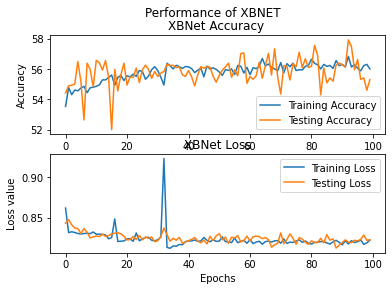

high    1839
ok      1821
Name: cholesterol_ldl_human, dtype: int64

In [14]:
# LDL
m_ldl = xbnet_model(df_trainu,y_cholesterol_ldl_human,2,0.01)
# Cholesterol ldl
cholesterol_ldl_human = predict(m_ldl,X_testu.to_numpy())
test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
test['cholesterol_ldl_human'].value_counts()

Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


Percentage training completed:   1%|          | 1/100 [00:31<52:33, 31.86s/it]

Training Loss after epoch 1 is 1.045851222819013 and Accuracy is 52.42790073775989
Validation Loss after epoch 1 is 0.9987844824790955 and Accuracy is 54.929577464788736


Percentage training completed:   2%|▏         | 2/100 [01:04<52:22, 32.06s/it]

Training Loss after epoch 2 is 1.0181363736611067 and Accuracy is 53.199195171026155
Validation Loss after epoch 2 is 0.994382381439209 and Accuracy is 54.929577464788736


Percentage training completed:   3%|▎         | 3/100 [01:36<52:19, 32.37s/it]

Training Loss after epoch 3 is 1.0124779777209647 and Accuracy is 53.098591549295776
Validation Loss after epoch 3 is 1.0158355236053467 and Accuracy is 55.13302034428795


Percentage training completed:   4%|▍         | 4/100 [02:09<51:52, 32.42s/it]

Training Loss after epoch 4 is 1.012490821498658 and Accuracy is 52.97786720321932
Validation Loss after epoch 4 is 1.0043634176254272 and Accuracy is 55.070422535211264


Percentage training completed:   5%|▌         | 5/100 [02:40<50:51, 32.12s/it]

Training Loss after epoch 5 is 1.0116801417948351 and Accuracy is 53.17236753856472
Validation Loss after epoch 5 is 0.9896164536476135 and Accuracy is 55.13302034428795


Percentage training completed:   6%|▌         | 6/100 [03:11<49:47, 31.78s/it]

Training Loss after epoch 6 is 1.0143894090161303 and Accuracy is 52.87726358148893
Validation Loss after epoch 6 is 0.9924644231796265 and Accuracy is 54.679186228482


Percentage training completed:   7%|▋         | 7/100 [03:44<49:46, 32.12s/it]

Training Loss after epoch 7 is 1.0098737940000362 and Accuracy is 52.97786720321932
Validation Loss after epoch 7 is 0.9836809039115906 and Accuracy is 55.13302034428795


Percentage training completed:   8%|▊         | 8/100 [04:17<49:23, 32.21s/it]

Training Loss after epoch 8 is 1.0109985071702066 and Accuracy is 52.89067739771965
Validation Loss after epoch 8 is 0.989152729511261 and Accuracy is 55.13302034428795


Percentage training completed:   9%|▉         | 9/100 [04:48<48:32, 32.01s/it]

Training Loss after epoch 9 is 1.0236568204067296 and Accuracy is 52.51509054325956
Validation Loss after epoch 9 is 0.987949013710022 and Accuracy is 55.0547730829421


Percentage training completed:  10%|█         | 10/100 [05:18<47:02, 31.36s/it]

Training Loss after epoch 10 is 1.0069843698213028 and Accuracy is 52.991281019450035
Validation Loss after epoch 10 is 0.9963675141334534 and Accuracy is 55.13302034428795


Percentage training completed:  11%|█         | 11/100 [05:49<46:02, 31.04s/it]

Training Loss after epoch 11 is 1.010794726692044 and Accuracy is 52.991281019450035
Validation Loss after epoch 11 is 0.9946944713592529 and Accuracy is 54.77308294209703


Percentage training completed:  12%|█▏        | 12/100 [06:19<45:28, 31.01s/it]

Training Loss after epoch 12 is 1.0111299850398379 and Accuracy is 52.79007377598927
Validation Loss after epoch 12 is 0.9909836053848267 and Accuracy is 55.13302034428795


Percentage training completed:  13%|█▎        | 13/100 [06:49<44:21, 30.59s/it]

Training Loss after epoch 13 is 1.009251435810916 and Accuracy is 52.823608316566066
Validation Loss after epoch 13 is 0.994086503982544 and Accuracy is 55.02347417840375


Percentage training completed:  14%|█▍        | 14/100 [07:20<43:54, 30.63s/it]

Training Loss after epoch 14 is 1.009197985793388 and Accuracy is 52.87055667337358
Validation Loss after epoch 14 is 0.9814194440841675 and Accuracy is 55.13302034428795


Percentage training completed:  15%|█▌        | 15/100 [07:50<43:23, 30.63s/it]

Training Loss after epoch 15 is 1.0129192868015797 and Accuracy is 52.87726358148893
Validation Loss after epoch 15 is 1.0259926319122314 and Accuracy is 55.13302034428795


Percentage training completed:  16%|█▌        | 16/100 [08:20<42:27, 30.32s/it]

Training Loss after epoch 16 is 1.017282611054924 and Accuracy is 52.541918175720994
Validation Loss after epoch 16 is 0.986329972743988 and Accuracy is 54.86697965571205


Percentage training completed:  17%|█▋        | 17/100 [08:50<41:55, 30.30s/it]

Training Loss after epoch 17 is 1.0088733622700359 and Accuracy is 52.97786720321932
Validation Loss after epoch 17 is 0.9972193241119385 and Accuracy is 54.97652582159625


Percentage training completed:  18%|█▊        | 18/100 [09:20<41:14, 30.17s/it]

Training Loss after epoch 18 is 1.00544940056719 and Accuracy is 52.964453386988595
Validation Loss after epoch 18 is 0.9987795948982239 and Accuracy is 54.97652582159625


Percentage training completed:  19%|█▉        | 19/100 [09:50<40:45, 30.19s/it]

Training Loss after epoch 19 is 1.011373499560254 and Accuracy is 52.87726358148893
Validation Loss after epoch 19 is 0.9845246076583862 and Accuracy is 55.039123630672925


Percentage training completed:  20%|██        | 20/100 [10:20<39:54, 29.93s/it]

Training Loss after epoch 20 is 1.0071570478027982 and Accuracy is 52.883970489604295
Validation Loss after epoch 20 is 0.9926449656486511 and Accuracy is 55.08607198748044


Percentage training completed:  21%|██        | 21/100 [10:50<39:22, 29.91s/it]

Training Loss after epoch 21 is 1.0113265698559806 and Accuracy is 52.823608316566066
Validation Loss after epoch 21 is 0.9859730005264282 and Accuracy is 54.647887323943664


Percentage training completed:  22%|██▏       | 22/100 [11:19<38:51, 29.90s/it]

Training Loss after epoch 22 is 1.018169696366838 and Accuracy is 52.42790073775989
Validation Loss after epoch 22 is 0.9887861609458923 and Accuracy is 55.039123630672925


Percentage training completed:  23%|██▎       | 23/100 [11:49<38:02, 29.65s/it]

Training Loss after epoch 23 is 1.0052970826881638 and Accuracy is 52.68276324614353
Validation Loss after epoch 23 is 0.9937869906425476 and Accuracy is 54.85133020344288


Percentage training completed:  24%|██▍       | 24/100 [12:18<37:23, 29.52s/it]

Training Loss after epoch 24 is 1.008997179791651 and Accuracy is 52.991281019450035
Validation Loss after epoch 24 is 0.9959180951118469 and Accuracy is 55.08607198748044


Percentage training completed:  25%|██▌       | 25/100 [12:48<37:03, 29.65s/it]

Training Loss after epoch 25 is 1.0100436682609018 and Accuracy is 52.93762575452716
Validation Loss after epoch 25 is 1.0000364780426025 and Accuracy is 55.13302034428795


Percentage training completed:  26%|██▌       | 26/100 [13:18<36:40, 29.74s/it]

Training Loss after epoch 26 is 1.0118893512840434 and Accuracy is 52.84372904091214
Validation Loss after epoch 26 is 0.9799651503562927 and Accuracy is 55.08607198748044


Percentage training completed:  27%|██▋       | 27/100 [13:47<36:12, 29.76s/it]

Training Loss after epoch 27 is 1.0064629171795088 and Accuracy is 52.904091213950366
Validation Loss after epoch 27 is 0.9992272257804871 and Accuracy is 54.74178403755869


Percentage training completed:  28%|██▊       | 28/100 [14:18<35:50, 29.87s/it]

Training Loss after epoch 28 is 1.026837443333327 and Accuracy is 52.56874580818243
Validation Loss after epoch 28 is 0.9876906871795654 and Accuracy is 55.13302034428795


Percentage training completed:  29%|██▉       | 29/100 [14:49<35:44, 30.20s/it]

Training Loss after epoch 29 is 1.0051917747110768 and Accuracy is 52.776659959758554
Validation Loss after epoch 29 is 1.0195226669311523 and Accuracy is 55.13302034428795


Percentage training completed:  30%|███       | 30/100 [15:19<35:25, 30.36s/it]

Training Loss after epoch 30 is 1.0054208051749054 and Accuracy is 52.76995305164319
Validation Loss after epoch 30 is 0.9899651408195496 and Accuracy is 55.13302034428795


Percentage training completed:  31%|███       | 31/100 [15:50<34:59, 30.43s/it]

Training Loss after epoch 31 is 1.0052886666658098 and Accuracy is 52.65593561368209
Validation Loss after epoch 31 is 0.9835754632949829 and Accuracy is 55.0547730829421


Percentage training completed:  32%|███▏      | 32/100 [16:20<34:13, 30.20s/it]

Training Loss after epoch 32 is 1.0112172975304812 and Accuracy is 52.87055667337358
Validation Loss after epoch 32 is 0.9879667162895203 and Accuracy is 55.117370892018776


Percentage training completed:  33%|███▎      | 33/100 [16:51<34:01, 30.47s/it]

Training Loss after epoch 33 is 1.0066400020675086 and Accuracy is 52.816901408450704
Validation Loss after epoch 33 is 0.992473304271698 and Accuracy is 54.694835680751176


Percentage training completed:  34%|███▍      | 34/100 [17:22<33:51, 30.79s/it]

Training Loss after epoch 34 is 1.0085427062705863 and Accuracy is 52.904091213950366
Validation Loss after epoch 34 is 0.9899318218231201 and Accuracy is 55.13302034428795


Percentage training completed:  35%|███▌      | 35/100 [17:53<33:23, 30.82s/it]

Training Loss after epoch 35 is 1.006692671852562 and Accuracy is 52.857142857142854
Validation Loss after epoch 35 is 0.9869987368583679 and Accuracy is 55.08607198748044


Percentage training completed:  36%|███▌      | 36/100 [18:23<32:37, 30.59s/it]

Training Loss after epoch 36 is 1.0106869809361487 and Accuracy is 52.87055667337358
Validation Loss after epoch 36 is 1.0205320119857788 and Accuracy is 55.117370892018776


Percentage training completed:  37%|███▋      | 37/100 [18:54<32:04, 30.54s/it]

Training Loss after epoch 37 is 1.1033737352477635 and Accuracy is 51.23407109322602
Validation Loss after epoch 37 is 0.9778411388397217 and Accuracy is 54.74178403755869


Percentage training completed:  38%|███▊      | 38/100 [19:24<31:25, 30.41s/it]

Training Loss after epoch 38 is 0.9999591827136765 and Accuracy is 52.83702213279678
Validation Loss after epoch 38 is 0.9774172306060791 and Accuracy is 55.13302034428795


Percentage training completed:  39%|███▉      | 39/100 [19:54<30:56, 30.43s/it]

Training Loss after epoch 39 is 0.9980274111416206 and Accuracy is 52.78336686787391
Validation Loss after epoch 39 is 0.9783657193183899 and Accuracy is 54.71048513302034


Percentage training completed:  40%|████      | 40/100 [20:24<30:14, 30.24s/it]

Training Loss after epoch 40 is 1.0018809455658746 and Accuracy is 52.99798792756539
Validation Loss after epoch 40 is 0.9787126779556274 and Accuracy is 55.117370892018776


Percentage training completed:  41%|████      | 41/100 [20:55<30:03, 30.57s/it]

Training Loss after epoch 41 is 1.0023000974511895 and Accuracy is 52.776659959758554
Validation Loss after epoch 41 is 0.988806962966919 and Accuracy is 55.02347417840375


Percentage training completed:  42%|████▏     | 42/100 [21:27<29:58, 31.01s/it]

Training Loss after epoch 42 is 1.004978690536237 and Accuracy is 52.67605633802817
Validation Loss after epoch 42 is 0.9905886054039001 and Accuracy is 55.070422535211264


Percentage training completed:  43%|████▎     | 43/100 [21:59<29:37, 31.18s/it]

Training Loss after epoch 43 is 1.0043528866614395 and Accuracy is 52.776659959758554
Validation Loss after epoch 43 is 0.9877366423606873 and Accuracy is 54.74178403755869


Percentage training completed:  44%|████▍     | 44/100 [22:30<29:10, 31.25s/it]

Training Loss after epoch 44 is 1.0061504592711321 and Accuracy is 52.94433266264252
Validation Loss after epoch 44 is 0.9892480969429016 and Accuracy is 55.039123630672925


Percentage training completed:  45%|████▌     | 45/100 [23:02<28:42, 31.33s/it]

Training Loss after epoch 45 is 1.006569784726196 and Accuracy is 52.776659959758554
Validation Loss after epoch 45 is 0.9919745922088623 and Accuracy is 54.9452269170579


Percentage training completed:  46%|████▌     | 46/100 [23:33<28:06, 31.24s/it]

Training Loss after epoch 46 is 1.011438936123009 and Accuracy is 53.031522468142185
Validation Loss after epoch 46 is 0.9785834550857544 and Accuracy is 55.13302034428795


Percentage training completed:  47%|████▋     | 47/100 [24:03<27:18, 30.92s/it]

Training Loss after epoch 47 is 1.0048779299075 and Accuracy is 52.924211938296445
Validation Loss after epoch 47 is 0.9848605394363403 and Accuracy is 55.13302034428795


Percentage training completed:  48%|████▊     | 48/100 [24:34<26:49, 30.96s/it]

Training Loss after epoch 48 is 1.0066622821814002 and Accuracy is 52.87055667337358
Validation Loss after epoch 48 is 0.977581262588501 and Accuracy is 55.00782472613459


Percentage training completed:  49%|████▉     | 49/100 [25:06<26:40, 31.38s/it]

Training Loss after epoch 49 is 1.0063432067504767 and Accuracy is 52.7364185110664
Validation Loss after epoch 49 is 0.9786523580551147 and Accuracy is 55.13302034428795


Percentage training completed:  50%|█████     | 50/100 [25:38<26:07, 31.35s/it]

Training Loss after epoch 50 is 1.01017237835176 and Accuracy is 52.66264252179745
Validation Loss after epoch 50 is 0.9909665584564209 and Accuracy is 55.13302034428795


Percentage training completed:  51%|█████     | 51/100 [26:08<25:19, 31.01s/it]

Training Loss after epoch 51 is 1.0073168597507887 and Accuracy is 52.84372904091214
Validation Loss after epoch 51 is 0.9856925010681152 and Accuracy is 54.7887323943662


Percentage training completed:  52%|█████▏    | 52/100 [26:38<24:38, 30.79s/it]

Training Loss after epoch 52 is 1.0064331985082748 and Accuracy is 52.91079812206573
Validation Loss after epoch 52 is 0.9892009496688843 and Accuracy is 55.039123630672925


Percentage training completed:  53%|█████▎    | 53/100 [27:09<24:10, 30.86s/it]

Training Loss after epoch 53 is 1.0078119427093621 and Accuracy is 53.12541918175721
Validation Loss after epoch 53 is 0.9882528185844421 and Accuracy is 55.13302034428795


Percentage training completed:  54%|█████▍    | 54/100 [27:40<23:40, 30.87s/it]

Training Loss after epoch 54 is 1.0038016013833075 and Accuracy is 52.97786720321932
Validation Loss after epoch 54 is 0.9861853718757629 and Accuracy is 54.71048513302034


Percentage training completed:  55%|█████▌    | 55/100 [28:10<22:56, 30.60s/it]

Training Loss after epoch 55 is 1.0067501421138452 and Accuracy is 52.89067739771965
Validation Loss after epoch 55 is 0.98512864112854 and Accuracy is 55.13302034428795


Percentage training completed:  56%|█████▌    | 56/100 [28:41<22:26, 30.60s/it]

Training Loss after epoch 56 is 1.0122495971524152 and Accuracy is 52.756539235412475
Validation Loss after epoch 56 is 0.9808679223060608 and Accuracy is 55.13302034428795


Percentage training completed:  57%|█████▋    | 57/100 [29:13<22:15, 31.05s/it]

Training Loss after epoch 57 is 1.0062530290159544 and Accuracy is 52.991281019450035
Validation Loss after epoch 57 is 0.9765802621841431 and Accuracy is 55.13302034428795


Percentage training completed:  58%|█████▊    | 58/100 [29:43<21:37, 30.89s/it]

Training Loss after epoch 58 is 1.0033410114791772 and Accuracy is 52.904091213950366
Validation Loss after epoch 58 is 0.9933043122291565 and Accuracy is 55.0547730829421


Percentage training completed:  59%|█████▉    | 59/100 [30:14<21:09, 30.96s/it]

Training Loss after epoch 59 is 1.0089510671570576 and Accuracy is 52.83031522468142
Validation Loss after epoch 59 is 0.9826518893241882 and Accuracy is 55.13302034428795


Percentage training completed:  60%|██████    | 60/100 [30:45<20:32, 30.80s/it]

Training Loss after epoch 60 is 1.011021378725895 and Accuracy is 52.823608316566066
Validation Loss after epoch 60 is 0.9802112579345703 and Accuracy is 55.13302034428795


Percentage training completed:  61%|██████    | 61/100 [31:15<19:53, 30.61s/it]

Training Loss after epoch 61 is 1.004495787006591 and Accuracy is 52.8504359490275
Validation Loss after epoch 61 is 0.9930049777030945 and Accuracy is 55.070422535211264


Percentage training completed:  62%|██████▏   | 62/100 [31:45<19:18, 30.48s/it]

Training Loss after epoch 62 is 1.0072675869188594 and Accuracy is 53.0784708249497
Validation Loss after epoch 62 is 0.9849355816841125 and Accuracy is 55.13302034428795


Percentage training completed:  63%|██████▎   | 63/100 [32:15<18:42, 30.34s/it]

Training Loss after epoch 63 is 1.008471948266541 and Accuracy is 52.69617706237425
Validation Loss after epoch 63 is 0.9859445691108704 and Accuracy is 54.66353677621283


Percentage training completed:  64%|██████▍   | 64/100 [32:45<18:11, 30.33s/it]

Training Loss after epoch 64 is 1.009610794516592 and Accuracy is 52.76995305164319
Validation Loss after epoch 64 is 0.9809404015541077 and Accuracy is 55.13302034428795


Percentage training completed:  65%|██████▌   | 65/100 [33:16<17:40, 30.31s/it]

Training Loss after epoch 65 is 1.0074622289561406 and Accuracy is 52.68276324614353
Validation Loss after epoch 65 is 0.9793521761894226 and Accuracy is 55.13302034428795


Percentage training completed:  66%|██████▌   | 66/100 [33:46<17:06, 30.21s/it]

Training Loss after epoch 66 is 1.002778449155742 and Accuracy is 52.97116029510396
Validation Loss after epoch 66 is 0.9894927740097046 and Accuracy is 55.13302034428795


Percentage training completed:  67%|██████▋   | 67/100 [34:16<16:39, 30.28s/it]

Training Loss after epoch 67 is 1.005865825092332 and Accuracy is 52.97786720321932
Validation Loss after epoch 67 is 0.979400634765625 and Accuracy is 55.02347417840375


Percentage training completed:  68%|██████▊   | 68/100 [34:47<16:12, 30.39s/it]

Training Loss after epoch 68 is 1.0066722201687073 and Accuracy is 53.031522468142185
Validation Loss after epoch 68 is 0.9847509264945984 and Accuracy is 54.89827856025039


Percentage training completed:  69%|██████▉   | 69/100 [35:17<15:38, 30.26s/it]

Training Loss after epoch 69 is 1.007482734105106 and Accuracy is 52.883970489604295
Validation Loss after epoch 69 is 0.9827324748039246 and Accuracy is 55.13302034428795


Percentage training completed:  70%|███████   | 70/100 [35:47<15:09, 30.32s/it]

Training Loss after epoch 70 is 1.006118662111749 and Accuracy is 52.823608316566066
Validation Loss after epoch 70 is 0.9785444140434265 and Accuracy is 55.02347417840375


Percentage training completed:  71%|███████   | 71/100 [36:18<14:46, 30.56s/it]

Training Loss after epoch 71 is 1.0066561805076353 and Accuracy is 52.78336686787391
Validation Loss after epoch 71 is 0.9844861030578613 and Accuracy is 55.13302034428795


Percentage training completed:  72%|███████▏  | 72/100 [36:50<14:24, 30.86s/it]

Training Loss after epoch 72 is 1.0059275176903721 and Accuracy is 52.904091213950366
Validation Loss after epoch 72 is 1.0232595205307007 and Accuracy is 55.13302034428795


Percentage training completed:  73%|███████▎  | 73/100 [37:21<13:56, 30.98s/it]

Training Loss after epoch 73 is 1.0085429825496264 and Accuracy is 52.94433266264252
Validation Loss after epoch 73 is 0.9864602088928223 and Accuracy is 55.13302034428795


Percentage training completed:  74%|███████▍  | 74/100 [37:53<13:29, 31.12s/it]

Training Loss after epoch 74 is 1.0071447082343532 and Accuracy is 52.87055667337358
Validation Loss after epoch 74 is 1.009458065032959 and Accuracy is 55.13302034428795


Percentage training completed:  75%|███████▌  | 75/100 [38:24<12:58, 31.16s/it]

Training Loss after epoch 75 is 1.0051837824444914 and Accuracy is 52.81019450033534
Validation Loss after epoch 75 is 0.9786676168441772 and Accuracy is 55.13302034428795


Percentage training completed:  76%|███████▌  | 76/100 [38:56<12:31, 31.32s/it]

Training Loss after epoch 76 is 1.007869465796221 and Accuracy is 52.76324614352783
Validation Loss after epoch 76 is 0.9839044213294983 and Accuracy is 54.85133020344288


Percentage training completed:  77%|███████▋  | 77/100 [39:27<12:01, 31.37s/it]

Training Loss after epoch 77 is 1.0022035706708359 and Accuracy is 53.0449362843729
Validation Loss after epoch 77 is 0.9773244261741638 and Accuracy is 55.13302034428795


Percentage training completed:  78%|███████▊  | 78/100 [39:58<11:28, 31.29s/it]

Training Loss after epoch 78 is 1.0039902068514681 and Accuracy is 52.91079812206573
Validation Loss after epoch 78 is 0.9848017692565918 and Accuracy is 55.08607198748044


Percentage training completed:  79%|███████▉  | 79/100 [40:30<10:57, 31.31s/it]

Training Loss after epoch 79 is 1.0050805163741623 and Accuracy is 52.87055667337358
Validation Loss after epoch 79 is 0.9954196810722351 and Accuracy is 56.10328638497653


Percentage training completed:  80%|████████  | 80/100 [41:01<10:25, 31.26s/it]

Training Loss after epoch 80 is 1.0085967148578219 and Accuracy is 52.93762575452716
Validation Loss after epoch 80 is 0.9782463312149048 and Accuracy is 54.99217527386541


Percentage training completed:  81%|████████  | 81/100 [41:32<09:54, 31.30s/it]

Training Loss after epoch 81 is 1.009846994165699 and Accuracy is 52.87055667337358
Validation Loss after epoch 81 is 0.9914924502372742 and Accuracy is 55.13302034428795


Percentage training completed:  82%|████████▏ | 82/100 [42:04<09:26, 31.47s/it]

Training Loss after epoch 82 is 1.003092739587178 and Accuracy is 52.964453386988595
Validation Loss after epoch 82 is 0.9833137392997742 and Accuracy is 55.743348982785605


Percentage training completed:  83%|████████▎ | 83/100 [42:35<08:55, 31.47s/it]

Training Loss after epoch 83 is 1.0082321463736341 and Accuracy is 52.83031522468142
Validation Loss after epoch 83 is 0.9865749478340149 and Accuracy is 55.195618153364634


Percentage training completed:  84%|████████▍ | 84/100 [43:07<08:22, 31.42s/it]

Training Loss after epoch 84 is 1.0055774167627736 and Accuracy is 52.904091213950366
Validation Loss after epoch 84 is 0.9803754687309265 and Accuracy is 55.0547730829421


Percentage training completed:  85%|████████▌ | 85/100 [43:38<07:50, 31.40s/it]

Training Loss after epoch 85 is 1.0075617990268657 and Accuracy is 52.83702213279678
Validation Loss after epoch 85 is 0.980319082736969 and Accuracy is 55.070422535211264


Percentage training completed:  86%|████████▌ | 86/100 [44:10<07:20, 31.46s/it]

Training Loss after epoch 86 is 1.002283603464585 and Accuracy is 52.87055667337358
Validation Loss after epoch 86 is 0.9790520668029785 and Accuracy is 54.74178403755869


Percentage training completed:  87%|████████▋ | 87/100 [44:41<06:46, 31.29s/it]

Training Loss after epoch 87 is 1.0079935405387388 and Accuracy is 53.08517773306506
Validation Loss after epoch 87 is 0.9827052354812622 and Accuracy is 55.14866979655712


Percentage training completed:  88%|████████▊ | 88/100 [45:11<06:11, 31.00s/it]

Training Loss after epoch 88 is 1.0079018872694907 and Accuracy is 52.904091213950366
Validation Loss after epoch 88 is 0.978503406047821 and Accuracy is 54.99217527386541


Percentage training completed:  89%|████████▉ | 89/100 [45:42<05:40, 30.91s/it]

Training Loss after epoch 89 is 1.0028330389522175 and Accuracy is 52.883970489604295
Validation Loss after epoch 89 is 0.9865406155586243 and Accuracy is 55.52425665101721


Percentage training completed:  90%|█████████ | 90/100 [46:12<05:07, 30.79s/it]

Training Loss after epoch 90 is 1.0059704473601903 and Accuracy is 52.97786720321932
Validation Loss after epoch 90 is 0.9922836422920227 and Accuracy is 56.04068857589984


Percentage training completed:  91%|█████████ | 91/100 [46:43<04:36, 30.76s/it]

Training Loss after epoch 91 is 1.0055020415731766 and Accuracy is 52.89738430583501
Validation Loss after epoch 91 is 0.9749429225921631 and Accuracy is 55.13302034428795


Percentage training completed:  92%|█████████▏| 92/100 [47:14<04:06, 30.87s/it]

Training Loss after epoch 92 is 1.0026028658954882 and Accuracy is 53.17907444668008
Validation Loss after epoch 92 is 0.9838104248046875 and Accuracy is 55.352112676056336


Percentage training completed:  93%|█████████▎| 93/100 [47:45<03:37, 31.02s/it]

Training Loss after epoch 93 is 1.0079569615775423 and Accuracy is 52.83031522468142
Validation Loss after epoch 93 is 0.9776065945625305 and Accuracy is 55.13302034428795


Percentage training completed:  94%|█████████▍| 94/100 [48:16<03:05, 31.00s/it]

Training Loss after epoch 94 is 1.0061936271037155 and Accuracy is 53.06505700871898
Validation Loss after epoch 94 is 0.9932230114936829 and Accuracy is 55.88419405320814


Percentage training completed:  95%|█████████▌| 95/100 [48:47<02:34, 30.90s/it]

Training Loss after epoch 95 is 1.0025765857471416 and Accuracy is 53.0784708249497
Validation Loss after epoch 95 is 0.9879816174507141 and Accuracy is 55.02347417840375


Percentage training completed:  96%|█████████▌| 96/100 [49:17<02:03, 30.79s/it]

Training Loss after epoch 96 is 1.0035302780984297 and Accuracy is 52.924211938296445
Validation Loss after epoch 96 is 0.9854736924171448 and Accuracy is 55.195618153364634


Percentage training completed:  97%|█████████▋| 97/100 [49:48<01:32, 30.70s/it]

Training Loss after epoch 97 is 1.0040983822468523 and Accuracy is 52.83702213279678
Validation Loss after epoch 97 is 0.9875218272209167 and Accuracy is 55.10172143974961


Percentage training completed:  98%|█████████▊| 98/100 [50:19<01:01, 30.73s/it]

Training Loss after epoch 98 is 1.0048858761275787 and Accuracy is 53.08517773306506
Validation Loss after epoch 98 is 0.9821385145187378 and Accuracy is 56.087636932707355


Percentage training completed:  99%|█████████▉| 99/100 [50:50<00:30, 30.95s/it]

Training Loss after epoch 99 is 1.0036693752579422 and Accuracy is 53.18578135479544
Validation Loss after epoch 99 is 0.9905819892883301 and Accuracy is 55.821596244131456


Percentage training completed: 100%|██████████| 100/100 [51:20<00:00, 30.81s/it]

Training Loss after epoch 100 is 1.007745374169984 and Accuracy is 53.098591549295776
Validation Loss after epoch 100 is 0.9798169136047363 and Accuracy is 54.929577464788736
              precision    recall  f1-score   support

           0       0.42      0.09      0.15      3804
           1       0.54      0.95      0.69      7937
           2       0.46      0.02      0.03      3169

    accuracy                           0.53     14910
   macro avg       0.47      0.35      0.29     14910
weighted avg       0.49      0.53      0.41     14910



              precision    recall  f1-score   support

           0       0.41      0.05      0.08      1536
           1       0.55      0.98      0.71      3523
           2       0.00      0.00      0.00      1331

    accuracy                           0.55      6390
   macro avg       0.32      0.34      0.26      6390
weighted avg       0.40      0.55      0.41      6390

Validation Loss after epoch 100 is 0.9798169136047363 and Accuracy is 54.929577464788736


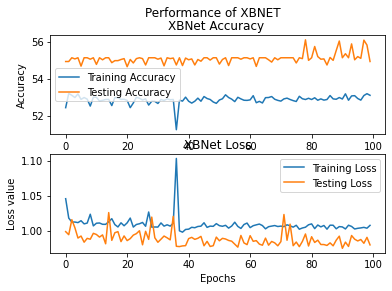

ok     3644
low      16
Name: hdl_cholesterol_human, dtype: int64

In [15]:
# HDL
m_hdl = xbnet_model(df_trainu,y_hdl_cholesterol_human,2,0.01)
# Cholesterol hdl
hdl_cholesterol_human = predict(m_hdl,X_testu.to_numpy())
test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
test['hdl_cholesterol_human'].value_counts()

Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


Percentage training completed:   1%|          | 1/100 [00:22<36:59, 22.42s/it]

Training Loss after epoch 1 is 0.5059059901810511 and Accuracy is 87.24346076458752
Validation Loss after epoch 1 is 0.48429474234580994 and Accuracy is 87.51173708920187


Percentage training completed:   2%|▏         | 2/100 [00:44<36:39, 22.44s/it]

Training Loss after epoch 2 is 0.47955468141917507 and Accuracy is 87.24346076458752
Validation Loss after epoch 2 is 0.48603004217147827 and Accuracy is 87.51173708920187


Percentage training completed:   3%|▎         | 3/100 [01:07<36:19, 22.47s/it]

Training Loss after epoch 3 is 0.4795219176508838 and Accuracy is 87.24346076458752
Validation Loss after epoch 3 is 0.4665374755859375 and Accuracy is 87.51173708920187


Percentage training completed:   4%|▍         | 4/100 [01:29<36:00, 22.50s/it]

Training Loss after epoch 4 is 0.4745457414137959 and Accuracy is 87.24346076458752
Validation Loss after epoch 4 is 0.46488991379737854 and Accuracy is 87.51173708920187


Percentage training completed:   5%|▌         | 5/100 [01:52<35:41, 22.55s/it]

Training Loss after epoch 5 is 0.4739013063229716 and Accuracy is 87.24346076458752
Validation Loss after epoch 5 is 0.4641212224960327 and Accuracy is 87.51173708920187


Percentage training completed:   6%|▌         | 6/100 [02:14<35:13, 22.48s/it]

Training Loss after epoch 6 is 0.4773655769299284 and Accuracy is 87.24346076458752
Validation Loss after epoch 6 is 0.45990902185440063 and Accuracy is 87.51173708920187


Percentage training completed:   7%|▋         | 7/100 [02:37<34:46, 22.43s/it]

Training Loss after epoch 7 is 0.47502687480700373 and Accuracy is 87.24346076458752
Validation Loss after epoch 7 is 0.45940375328063965 and Accuracy is 87.51173708920187


Percentage training completed:   8%|▊         | 8/100 [02:59<34:21, 22.40s/it]

Training Loss after epoch 8 is 0.4735520907194062 and Accuracy is 87.24346076458752
Validation Loss after epoch 8 is 0.4697282016277313 and Accuracy is 87.51173708920187


Percentage training completed:   9%|▉         | 9/100 [03:22<34:04, 22.47s/it]

Training Loss after epoch 9 is 0.47655335474807303 and Accuracy is 87.24346076458752
Validation Loss after epoch 9 is 0.45959728956222534 and Accuracy is 87.51173708920187


Percentage training completed:  10%|█         | 10/100 [03:44<33:37, 22.41s/it]

Training Loss after epoch 10 is 0.47399438487549705 and Accuracy is 87.24346076458752
Validation Loss after epoch 10 is 0.4599820673465729 and Accuracy is 87.51173708920187


Percentage training completed:  11%|█         | 11/100 [04:06<33:08, 22.34s/it]

Training Loss after epoch 11 is 0.47788325898637074 and Accuracy is 87.24346076458752
Validation Loss after epoch 11 is 0.4588303864002228 and Accuracy is 87.51173708920187


Percentage training completed:  12%|█▏        | 12/100 [04:28<32:42, 22.30s/it]

Training Loss after epoch 12 is 0.47334149911552026 and Accuracy is 87.24346076458752
Validation Loss after epoch 12 is 0.45940151810646057 and Accuracy is 87.51173708920187


Percentage training completed:  13%|█▎        | 13/100 [04:51<32:20, 22.30s/it]

Training Loss after epoch 13 is 0.4779846676877128 and Accuracy is 87.24346076458752
Validation Loss after epoch 13 is 0.45827946066856384 and Accuracy is 87.51173708920187


Percentage training completed:  14%|█▍        | 14/100 [05:13<31:54, 22.26s/it]

Training Loss after epoch 14 is 0.4768253765968294 and Accuracy is 87.24346076458752
Validation Loss after epoch 14 is 0.460811048746109 and Accuracy is 87.51173708920187


Percentage training completed:  15%|█▌        | 15/100 [05:35<31:27, 22.20s/it]

Training Loss after epoch 15 is 0.47704412874489893 and Accuracy is 87.24346076458752
Validation Loss after epoch 15 is 0.4587077796459198 and Accuracy is 87.51173708920187


Percentage training completed:  16%|█▌        | 16/100 [05:57<31:06, 22.22s/it]

Training Loss after epoch 16 is 0.4743106322834676 and Accuracy is 87.24346076458752
Validation Loss after epoch 16 is 0.4585316777229309 and Accuracy is 87.51173708920187


Percentage training completed:  17%|█▋        | 17/100 [06:19<30:41, 22.18s/it]

Training Loss after epoch 17 is 0.48707629148668485 and Accuracy is 87.23675385647216
Validation Loss after epoch 17 is 0.46153542399406433 and Accuracy is 87.51173708920187


Percentage training completed:  18%|█▊        | 18/100 [06:41<30:11, 22.09s/it]

Training Loss after epoch 18 is 0.46881660209896736 and Accuracy is 87.24346076458752
Validation Loss after epoch 18 is 0.45997023582458496 and Accuracy is 87.51173708920187


Percentage training completed:  19%|█▉        | 19/100 [07:03<29:42, 22.00s/it]

Training Loss after epoch 19 is 0.47131747119288586 and Accuracy is 87.24346076458752
Validation Loss after epoch 19 is 0.4635728895664215 and Accuracy is 87.51173708920187


Percentage training completed:  20%|██        | 20/100 [07:25<29:12, 21.90s/it]

Training Loss after epoch 20 is 0.4755538517665198 and Accuracy is 87.24346076458752
Validation Loss after epoch 20 is 0.4579669237136841 and Accuracy is 87.51173708920187


Percentage training completed:  21%|██        | 21/100 [07:46<28:48, 21.88s/it]

Training Loss after epoch 21 is 0.47512863162313407 and Accuracy is 87.24346076458752
Validation Loss after epoch 21 is 0.4604557454586029 and Accuracy is 87.51173708920187


Percentage training completed:  22%|██▏       | 22/100 [08:08<28:25, 21.87s/it]

Training Loss after epoch 22 is 0.47400331986436517 and Accuracy is 87.24346076458752
Validation Loss after epoch 22 is 0.4618489742279053 and Accuracy is 87.51173708920187


Percentage training completed:  23%|██▎       | 23/100 [08:30<27:59, 21.81s/it]

Training Loss after epoch 23 is 0.47838407521467863 and Accuracy is 87.23675385647216
Validation Loss after epoch 23 is 0.46204128861427307 and Accuracy is 87.51173708920187


Percentage training completed:  24%|██▍       | 24/100 [08:52<27:33, 21.76s/it]

Training Loss after epoch 24 is 0.6296489654836352 and Accuracy is 86.4654594232059
Validation Loss after epoch 24 is 0.45618847012519836 and Accuracy is 87.51173708920187


Percentage training completed:  25%|██▌       | 25/100 [09:13<27:13, 21.78s/it]

Training Loss after epoch 25 is 0.464997220320763 and Accuracy is 87.24346076458752
Validation Loss after epoch 25 is 0.4554838538169861 and Accuracy is 87.51173708920187


Percentage training completed:  26%|██▌       | 26/100 [09:35<26:51, 21.78s/it]

Training Loss after epoch 26 is 0.4651598222713614 and Accuracy is 87.24346076458752
Validation Loss after epoch 26 is 0.4560714662075043 and Accuracy is 87.51173708920187


Percentage training completed:  27%|██▋       | 27/100 [09:57<26:33, 21.83s/it]

Training Loss after epoch 27 is 0.4655701989715703 and Accuracy is 87.24346076458752
Validation Loss after epoch 27 is 0.4571211636066437 and Accuracy is 87.51173708920187


Percentage training completed:  28%|██▊       | 28/100 [10:19<26:10, 21.82s/it]

Training Loss after epoch 28 is 0.4661716622632205 and Accuracy is 87.24346076458752
Validation Loss after epoch 28 is 0.45801299810409546 and Accuracy is 87.51173708920187


Percentage training completed:  29%|██▉       | 29/100 [10:41<25:47, 21.79s/it]

Training Loss after epoch 29 is 0.46684379212142574 and Accuracy is 87.24346076458752
Validation Loss after epoch 29 is 0.4569896459579468 and Accuracy is 87.51173708920187


Percentage training completed:  30%|███       | 30/100 [11:02<25:24, 21.78s/it]

Training Loss after epoch 30 is 0.46794714639562907 and Accuracy is 87.24346076458752
Validation Loss after epoch 30 is 0.4571689963340759 and Accuracy is 87.51173708920187


Percentage training completed:  31%|███       | 31/100 [11:24<25:01, 21.76s/it]

Training Loss after epoch 31 is 0.47219378214985 and Accuracy is 87.24346076458752
Validation Loss after epoch 31 is 0.4600628912448883 and Accuracy is 87.51173708920187


Percentage training completed:  32%|███▏      | 32/100 [11:46<24:34, 21.69s/it]

Training Loss after epoch 32 is 0.47136869214379223 and Accuracy is 87.23675385647216
Validation Loss after epoch 32 is 0.45882323384284973 and Accuracy is 87.51173708920187


Percentage training completed:  33%|███▎      | 33/100 [12:07<24:10, 21.65s/it]

Training Loss after epoch 33 is 0.4737912512228468 and Accuracy is 87.24346076458752
Validation Loss after epoch 33 is 0.4594689905643463 and Accuracy is 87.51173708920187


Percentage training completed:  34%|███▍      | 34/100 [12:29<23:47, 21.63s/it]

Training Loss after epoch 34 is 0.47632250424810235 and Accuracy is 87.24346076458752
Validation Loss after epoch 34 is 0.47283735871315 and Accuracy is 87.51173708920187


Percentage training completed:  35%|███▌      | 35/100 [12:50<23:25, 21.63s/it]

Training Loss after epoch 35 is 0.47433296680578346 and Accuracy is 87.23675385647216
Validation Loss after epoch 35 is 0.4690594971179962 and Accuracy is 87.51173708920187


Percentage training completed:  36%|███▌      | 36/100 [13:12<23:06, 21.67s/it]

Training Loss after epoch 36 is 0.47507019935759354 and Accuracy is 87.23675385647216
Validation Loss after epoch 36 is 0.47331535816192627 and Accuracy is 87.51173708920187


Percentage training completed:  37%|███▋      | 37/100 [13:34<22:49, 21.73s/it]

Training Loss after epoch 37 is 0.47432958008521614 and Accuracy is 87.24346076458752
Validation Loss after epoch 37 is 0.4679160714149475 and Accuracy is 87.51173708920187


Percentage training completed:  38%|███▊      | 38/100 [13:56<22:39, 21.93s/it]

Training Loss after epoch 38 is 0.47494092654005143 and Accuracy is 87.23675385647216
Validation Loss after epoch 38 is 0.4704095125198364 and Accuracy is 87.51173708920187


Percentage training completed:  39%|███▉      | 39/100 [14:19<22:29, 22.13s/it]

Training Loss after epoch 39 is 0.4740541295624086 and Accuracy is 87.2300469483568
Validation Loss after epoch 39 is 0.5108960866928101 and Accuracy is 87.51173708920187


Percentage training completed:  40%|████      | 40/100 [14:41<22:06, 22.12s/it]

Training Loss after epoch 40 is 0.47336760970719893 and Accuracy is 87.24346076458752
Validation Loss after epoch 40 is 0.47968998551368713 and Accuracy is 87.51173708920187


Percentage training completed:  41%|████      | 41/100 [15:03<21:38, 22.01s/it]

Training Loss after epoch 41 is 0.4770527736727516 and Accuracy is 87.24346076458752
Validation Loss after epoch 41 is 0.4642203152179718 and Accuracy is 87.51173708920187


Percentage training completed:  42%|████▏     | 42/100 [15:25<21:16, 22.01s/it]

Training Loss after epoch 42 is 0.473448895221744 and Accuracy is 87.24346076458752
Validation Loss after epoch 42 is 0.4851113259792328 and Accuracy is 87.51173708920187


Percentage training completed:  43%|████▎     | 43/100 [15:47<20:53, 21.99s/it]

Training Loss after epoch 43 is 0.4772493060790162 and Accuracy is 87.24346076458752
Validation Loss after epoch 43 is 0.4891189932823181 and Accuracy is 87.51173708920187


Percentage training completed:  44%|████▍     | 44/100 [16:09<20:29, 21.95s/it]

Training Loss after epoch 44 is 0.47578418190898814 and Accuracy is 87.23675385647216
Validation Loss after epoch 44 is 0.470930278301239 and Accuracy is 87.51173708920187


Percentage training completed:  45%|████▌     | 45/100 [16:30<20:03, 21.89s/it]

Training Loss after epoch 45 is 0.47403461174327927 and Accuracy is 87.23675385647216
Validation Loss after epoch 45 is 0.472234308719635 and Accuracy is 87.51173708920187


Percentage training completed:  46%|████▌     | 46/100 [16:52<19:42, 21.89s/it]

Training Loss after epoch 46 is 0.47346657832740713 and Accuracy is 87.23675385647216
Validation Loss after epoch 46 is 0.49099230766296387 and Accuracy is 87.51173708920187


Percentage training completed:  47%|████▋     | 47/100 [17:14<19:21, 21.91s/it]

Training Loss after epoch 47 is 0.4722485308067737 and Accuracy is 87.23675385647216
Validation Loss after epoch 47 is 0.49619194865226746 and Accuracy is 87.51173708920187


Percentage training completed:  48%|████▊     | 48/100 [17:36<18:53, 21.80s/it]

Training Loss after epoch 48 is 0.478370964479165 and Accuracy is 87.23675385647216
Validation Loss after epoch 48 is 0.45763862133026123 and Accuracy is 87.51173708920187


Percentage training completed:  49%|████▉     | 49/100 [17:57<18:27, 21.71s/it]

Training Loss after epoch 49 is 0.4766152499747251 and Accuracy is 87.24346076458752
Validation Loss after epoch 49 is 0.45921745896339417 and Accuracy is 87.51173708920187


Percentage training completed:  50%|█████     | 50/100 [18:19<18:02, 21.66s/it]

Training Loss after epoch 50 is 0.46953335329250717 and Accuracy is 87.24346076458752
Validation Loss after epoch 50 is 0.4989272654056549 and Accuracy is 87.51173708920187


Percentage training completed:  51%|█████     | 51/100 [18:40<17:38, 21.59s/it]

Training Loss after epoch 51 is 0.474685371801449 and Accuracy is 87.24346076458752
Validation Loss after epoch 51 is 0.4642118215560913 and Accuracy is 87.51173708920187


Percentage training completed:  52%|█████▏    | 52/100 [19:02<17:14, 21.54s/it]

Training Loss after epoch 52 is 0.47078418271224387 and Accuracy is 87.24346076458752
Validation Loss after epoch 52 is 0.4946233034133911 and Accuracy is 87.51173708920187


Percentage training completed:  53%|█████▎    | 53/100 [19:23<16:48, 21.46s/it]

Training Loss after epoch 53 is 0.4749481397892784 and Accuracy is 87.23675385647216
Validation Loss after epoch 53 is 0.4911327064037323 and Accuracy is 87.51173708920187


Percentage training completed:  54%|█████▍    | 54/100 [19:44<16:27, 21.46s/it]

Training Loss after epoch 54 is 0.4787563949407682 and Accuracy is 87.10932260228034
Validation Loss after epoch 54 is 0.45806241035461426 and Accuracy is 87.51173708920187


Percentage training completed:  55%|█████▌    | 55/100 [20:06<16:03, 21.41s/it]

Training Loss after epoch 55 is 0.4693348955506931 and Accuracy is 87.24346076458752
Validation Loss after epoch 55 is 0.4763033986091614 and Accuracy is 87.51173708920187


Percentage training completed:  56%|█████▌    | 56/100 [20:27<15:42, 21.42s/it]

Training Loss after epoch 56 is 0.4754413833657815 and Accuracy is 87.2300469483568
Validation Loss after epoch 56 is 0.4788563847541809 and Accuracy is 87.51173708920187


Percentage training completed:  57%|█████▋    | 57/100 [20:49<15:21, 21.44s/it]

Training Loss after epoch 57 is 0.4740623421647262 and Accuracy is 87.2300469483568
Validation Loss after epoch 57 is 0.4831209182739258 and Accuracy is 87.51173708920187


Percentage training completed:  58%|█████▊    | 58/100 [21:10<15:01, 21.47s/it]

Training Loss after epoch 58 is 0.47038895633599276 and Accuracy is 87.24346076458752
Validation Loss after epoch 58 is 0.4613150656223297 and Accuracy is 87.51173708920187


Percentage training completed:  59%|█████▉    | 59/100 [21:32<14:40, 21.47s/it]

Training Loss after epoch 59 is 0.47328947398156057 and Accuracy is 87.23675385647216
Validation Loss after epoch 59 is 0.48843586444854736 and Accuracy is 87.51173708920187


Percentage training completed:  60%|██████    | 60/100 [21:53<14:20, 21.52s/it]

Training Loss after epoch 60 is 0.4806554913360929 and Accuracy is 87.23675385647216
Validation Loss after epoch 60 is 0.4588424265384674 and Accuracy is 87.51173708920187


Percentage training completed:  61%|██████    | 61/100 [22:15<13:58, 21.51s/it]

Training Loss after epoch 61 is 0.4692134621988806 and Accuracy is 87.24346076458752
Validation Loss after epoch 61 is 0.457443505525589 and Accuracy is 87.51173708920187


Percentage training completed:  62%|██████▏   | 62/100 [22:36<13:37, 21.52s/it]

Training Loss after epoch 62 is 0.476891816221977 and Accuracy is 87.2300469483568
Validation Loss after epoch 62 is 0.4769178628921509 and Accuracy is 87.51173708920187


Percentage training completed:  63%|██████▎   | 63/100 [22:58<13:17, 21.57s/it]

Training Loss after epoch 63 is 0.47159726516435585 and Accuracy is 87.23675385647216
Validation Loss after epoch 63 is 0.4611455798149109 and Accuracy is 87.51173708920187


Percentage training completed:  64%|██████▍   | 64/100 [23:20<12:57, 21.59s/it]

Training Loss after epoch 64 is 0.4723593856611733 and Accuracy is 87.23675385647216
Validation Loss after epoch 64 is 0.46067267656326294 and Accuracy is 87.51173708920187


Percentage training completed:  65%|██████▌   | 65/100 [23:41<12:35, 21.60s/it]

Training Loss after epoch 65 is 0.4758929773653526 and Accuracy is 87.23675385647216
Validation Loss after epoch 65 is 0.4616001844406128 and Accuracy is 87.51173708920187


Percentage training completed:  66%|██████▌   | 66/100 [24:03<12:13, 21.58s/it]

Training Loss after epoch 66 is 0.4701987944639292 and Accuracy is 87.24346076458752
Validation Loss after epoch 66 is 0.49926745891571045 and Accuracy is 87.51173708920187


Percentage training completed:  67%|██████▋   | 67/100 [24:24<11:50, 21.54s/it]

Training Loss after epoch 67 is 0.48021183374773535 and Accuracy is 87.19651240778002
Validation Loss after epoch 67 is 0.45835524797439575 and Accuracy is 87.51173708920187


Percentage training completed:  68%|██████▊   | 68/100 [24:46<11:31, 21.62s/it]

Training Loss after epoch 68 is 0.46913876181444386 and Accuracy is 87.24346076458752
Validation Loss after epoch 68 is 0.46707403659820557 and Accuracy is 87.51173708920187


Percentage training completed:  69%|██████▉   | 69/100 [25:08<11:11, 21.66s/it]

Training Loss after epoch 69 is 0.4720208095026886 and Accuracy is 87.23675385647216
Validation Loss after epoch 69 is 0.4867355227470398 and Accuracy is 87.51173708920187


Percentage training completed:  70%|███████   | 70/100 [25:30<10:50, 21.70s/it]

Training Loss after epoch 70 is 0.47482546604370357 and Accuracy is 87.24346076458752
Validation Loss after epoch 70 is 0.48805826902389526 and Accuracy is 87.51173708920187


Percentage training completed:  71%|███████   | 71/100 [25:52<10:31, 21.77s/it]

Training Loss after epoch 71 is 0.47512768103457315 and Accuracy is 87.23675385647216
Validation Loss after epoch 71 is 0.49294865131378174 and Accuracy is 87.51173708920187


Percentage training completed:  72%|███████▏  | 72/100 [26:13<10:10, 21.80s/it]

Training Loss after epoch 72 is 0.47371982546451263 and Accuracy is 87.24346076458752
Validation Loss after epoch 72 is 0.4760299324989319 and Accuracy is 87.51173708920187


Percentage training completed:  73%|███████▎  | 73/100 [26:36<09:51, 21.89s/it]

Training Loss after epoch 73 is 0.47379562212354126 and Accuracy is 87.24346076458752
Validation Loss after epoch 73 is 0.4777649939060211 and Accuracy is 87.51173708920187


Percentage training completed:  74%|███████▍  | 74/100 [26:57<09:27, 21.84s/it]

Training Loss after epoch 74 is 0.4746498910654256 and Accuracy is 87.23675385647216
Validation Loss after epoch 74 is 0.48651519417762756 and Accuracy is 87.51173708920187


Percentage training completed:  75%|███████▌  | 75/100 [27:19<09:05, 21.81s/it]

Training Loss after epoch 75 is 0.4718959105596778 and Accuracy is 87.23675385647216
Validation Loss after epoch 75 is 0.4794326722621918 and Accuracy is 87.51173708920187


Percentage training completed:  76%|███████▌  | 76/100 [27:41<08:42, 21.77s/it]

Training Loss after epoch 76 is 0.4768260270836783 and Accuracy is 87.24346076458752
Validation Loss after epoch 76 is 0.46587398648262024 and Accuracy is 87.51173708920187


Percentage training completed:  77%|███████▋  | 77/100 [28:02<08:20, 21.78s/it]

Training Loss after epoch 77 is 0.4698788965432685 and Accuracy is 87.24346076458752
Validation Loss after epoch 77 is 0.4638940393924713 and Accuracy is 87.51173708920187


Percentage training completed:  78%|███████▊  | 78/100 [28:24<07:58, 21.75s/it]

Training Loss after epoch 78 is 0.47642895315529965 and Accuracy is 87.2300469483568
Validation Loss after epoch 78 is 0.4696141183376312 and Accuracy is 87.51173708920187


Percentage training completed:  79%|███████▉  | 79/100 [28:46<07:36, 21.76s/it]

Training Loss after epoch 79 is 0.47227744372809394 and Accuracy is 87.23675385647216
Validation Loss after epoch 79 is 0.4733034372329712 and Accuracy is 87.51173708920187


Percentage training completed:  80%|████████  | 80/100 [29:08<07:16, 21.85s/it]

Training Loss after epoch 80 is 0.4727245989083732 and Accuracy is 87.24346076458752
Validation Loss after epoch 80 is 0.49540719389915466 and Accuracy is 87.51173708920187


Percentage training completed:  81%|████████  | 81/100 [29:30<06:54, 21.84s/it]

Training Loss after epoch 81 is 0.47305379585710716 and Accuracy is 87.2300469483568
Validation Loss after epoch 81 is 0.4963851869106293 and Accuracy is 87.51173708920187


Percentage training completed:  82%|████████▏ | 82/100 [29:52<06:33, 21.84s/it]

Training Loss after epoch 82 is 0.47471153055009924 and Accuracy is 87.23675385647216
Validation Loss after epoch 82 is 0.4560246765613556 and Accuracy is 87.51173708920187


Percentage training completed:  83%|████████▎ | 83/100 [30:13<06:11, 21.84s/it]

Training Loss after epoch 83 is 0.471865808823078 and Accuracy is 87.24346076458752
Validation Loss after epoch 83 is 0.45734524726867676 and Accuracy is 87.51173708920187


Percentage training completed:  84%|████████▍ | 84/100 [30:35<05:48, 21.81s/it]

Training Loss after epoch 84 is 0.4709822450616585 and Accuracy is 87.23675385647216
Validation Loss after epoch 84 is 0.4675202965736389 and Accuracy is 87.51173708920187


Percentage training completed:  85%|████████▌ | 85/100 [30:57<05:27, 21.86s/it]

Training Loss after epoch 85 is 0.473725991267631 and Accuracy is 87.23675385647216
Validation Loss after epoch 85 is 0.4974770247936249 and Accuracy is 87.51173708920187


Percentage training completed:  86%|████████▌ | 86/100 [31:19<05:06, 21.89s/it]

Training Loss after epoch 86 is 0.4745801699871413 and Accuracy is 87.2300469483568
Validation Loss after epoch 86 is 0.5060892701148987 and Accuracy is 87.51173708920187


Percentage training completed:  87%|████████▋ | 87/100 [31:41<04:45, 21.95s/it]

Training Loss after epoch 87 is 0.4717220441626121 and Accuracy is 87.24346076458752
Validation Loss after epoch 87 is 0.5037022233009338 and Accuracy is 87.51173708920187


Percentage training completed:  88%|████████▊ | 88/100 [32:03<04:23, 22.00s/it]

Training Loss after epoch 88 is 0.4774459743704407 and Accuracy is 87.23675385647216
Validation Loss after epoch 88 is 0.46580982208251953 and Accuracy is 87.51173708920187


Percentage training completed:  89%|████████▉ | 89/100 [32:26<04:02, 22.05s/it]

Training Loss after epoch 89 is 0.47153751313878234 and Accuracy is 87.23675385647216
Validation Loss after epoch 89 is 0.4918449819087982 and Accuracy is 87.51173708920187


Percentage training completed:  90%|█████████ | 90/100 [32:48<03:41, 22.11s/it]

Training Loss after epoch 90 is 0.47258695645073967 and Accuracy is 87.24346076458752
Validation Loss after epoch 90 is 0.5024405121803284 and Accuracy is 87.51173708920187


Percentage training completed:  91%|█████████ | 91/100 [33:10<03:18, 22.06s/it]

Training Loss after epoch 91 is 0.47524318644225344 and Accuracy is 87.2300469483568
Validation Loss after epoch 91 is 0.469312846660614 and Accuracy is 87.51173708920187


Percentage training completed:  92%|█████████▏| 92/100 [33:32<02:56, 22.08s/it]

Training Loss after epoch 92 is 0.4740819873632024 and Accuracy is 87.23675385647216
Validation Loss after epoch 92 is 0.4719989001750946 and Accuracy is 87.51173708920187


Percentage training completed:  93%|█████████▎| 93/100 [33:54<02:34, 22.06s/it]

Training Loss after epoch 93 is 0.47101455002767334 and Accuracy is 87.23675385647216
Validation Loss after epoch 93 is 0.48726412653923035 and Accuracy is 87.51173708920187


Percentage training completed:  94%|█████████▍| 94/100 [34:16<02:12, 22.04s/it]

Training Loss after epoch 94 is 0.4773040258769314 and Accuracy is 87.23675385647216
Validation Loss after epoch 94 is 0.47673743963241577 and Accuracy is 87.51173708920187


Percentage training completed:  95%|█████████▌| 95/100 [34:38<01:50, 22.01s/it]

Training Loss after epoch 95 is 0.47119600896607655 and Accuracy is 87.23675385647216
Validation Loss after epoch 95 is 0.46594712138175964 and Accuracy is 87.51173708920187


Percentage training completed:  96%|█████████▌| 96/100 [35:00<01:28, 22.03s/it]

Training Loss after epoch 96 is 0.47147501498268907 and Accuracy is 87.23675385647216
Validation Loss after epoch 96 is 0.45925194025039673 and Accuracy is 87.51173708920187


Percentage training completed:  97%|█████████▋| 97/100 [35:22<01:06, 22.06s/it]

Training Loss after epoch 97 is 0.47357127430165274 and Accuracy is 87.23675385647216
Validation Loss after epoch 97 is 0.4685715436935425 and Accuracy is 87.51173708920187


Percentage training completed:  98%|█████████▊| 98/100 [35:44<00:44, 22.10s/it]

Training Loss after epoch 98 is 0.4724757141021956 and Accuracy is 87.23675385647216
Validation Loss after epoch 98 is 0.4696533977985382 and Accuracy is 87.51173708920187


Percentage training completed:  99%|█████████▉| 99/100 [36:07<00:22, 22.24s/it]

Training Loss after epoch 99 is 0.47380997128624774 and Accuracy is 87.24346076458752
Validation Loss after epoch 99 is 0.4697045385837555 and Accuracy is 87.51173708920187


Percentage training completed: 100%|██████████| 100/100 [36:29<00:00, 21.89s/it]

Training Loss after epoch 100 is 0.4742394937562073 and Accuracy is 87.23675385647216
Validation Loss after epoch 100 is 0.4920912981033325 and Accuracy is 87.51173708920187
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       896
           1       0.87      1.00      0.93     13008
           2       0.00      0.00      0.00      1006

    accuracy                           0.87     14910
   macro avg       0.29      0.33      0.31     14910
weighted avg       0.76      0.87      0.81     14910



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       364
           1       0.88      1.00      0.93      5592
           2       0.00      0.00      0.00       434

    accuracy                           0.88      6390
   macro avg       0.29      0.33      0.31      6390
weighted avg       0.77      0.88      0.82      6390

Validation Loss after epoch 100 is 0.4920912981033325 and Accuracy is 87.51173708920187


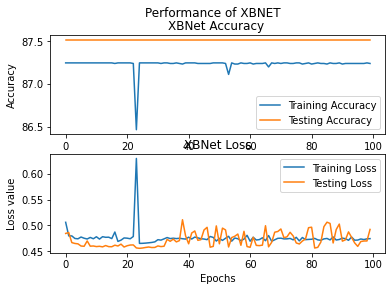

ok    3660
Name: hemoglobin_hgb_human, dtype: int64

In [16]:
# HDL
m_hgb = xbnet_model(df_trainu,y_hemoglobin_hgb_human,2,0.01)
# Cholesterol hdl
hemoglobin_hgb_human = predict(m_hgb,X_testu.to_numpy())
test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
test['hemoglobin_hgb_human'].value_counts()

#### Submission

In [18]:
#maindir = "/Users/Abimbola/Documents/MSc Computer Science/Semester 2/Computer science project/Blood-Spectorscopy/Data" # Directory with your files
maindir = "/content"
ss =  maindir+"/Updated_Sample_Submission.csv"
ss = pd.read_csv(ss)
ss.head()

ss = ss.drop(['Unnamed: 0'], axis= 1)

In [19]:
def transform_c_hdl(row):
    return pd.Series([str(row["donation_id"]) + "_hdl_cholesterol_human", row['hdl_cholesterol_human']])

In [20]:
sample_c_hdl = pd.DataFrame(columns = ss.columns)

In [21]:
from tqdm.notebook import tqdm

tqdm.pandas()
sample_c_hdl[['Donation_ID', 'target']] = test.progress_apply(transform_c_hdl, axis = 1)

  0%|          | 0/3660 [00:00<?, ?it/s]

In [22]:
def transform_hemo(row):
    return pd.Series([str(row["donation_id"]) + "_hemoglobin(hgb)_human", row["hemoglobin_hgb_human"]])

In [23]:
sample_hemo = pd.DataFrame(columns = ss.columns)

In [24]:
sample_hemo[['Donation_ID', 'target']] = test.progress_apply(transform_hemo, axis = 1)

  0%|          | 0/3660 [00:00<?, ?it/s]

In [25]:
sample_c_hdl

,Donation_ID,target
0,ID_2982_hdl_cholesterol_human,ok
1,ID_2982_hdl_cholesterol_human,ok
2,ID_2982_hdl_cholesterol_human,ok
3,ID_2982_hdl_cholesterol_human,ok
4,ID_2982_hdl_cholesterol_human,ok
...,...,...
3655,ID_3637_hdl_cholesterol_human,ok
3656,ID_3637_hdl_cholesterol_human,ok
3657,ID_3637_hdl_cholesterol_human,ok
3658,ID_3637_hdl_cholesterol_human,ok


In [26]:
def transform_c_ldl(row):
    return pd.Series([str(row["donation_id"]) + "_cholesterol_ldl_human", row["cholesterol_ldl_human"]])

In [27]:
sample_c_ldl = pd.DataFrame(columns = ss.columns)

In [28]:
sample_c_ldl[['Donation_ID', 'target']] = test.progress_apply(transform_c_ldl, axis = 1)

  0%|          | 0/3660 [00:00<?, ?it/s]

In [29]:
submission = pd.concat([sample_c_hdl, sample_hemo, sample_c_ldl]).reset_index(drop=True)

In [30]:
submission = submission.loc[:, ~submission.columns.str.contains('^Unnamed')]

In [31]:
submission.head()

,Donation_ID,target
0,ID_2982_hdl_cholesterol_human,ok
1,ID_2982_hdl_cholesterol_human,ok
2,ID_2982_hdl_cholesterol_human,ok
3,ID_2982_hdl_cholesterol_human,ok
4,ID_2982_hdl_cholesterol_human,ok


In [32]:
submission.to_csv("./submission24.csv", index=False)

#### To do
 - Bagging with random undersampling
 - Use boosting algorithms (AdaBoost etc)
 - Read up SMOTE for imbalanced classification